In [237]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec 
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import statistics

# Misc
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.titlepad'] = 12
plt.rcParams['figure.dpi'] = 300
mpl.rcParams['font.family'] = 'Serif'

![](https://i.guim.co.uk/img/media/98df465b969e5b04ba0116af334d3e7d48f86f55/0_70_4066_2440/master/4066.jpg?width=1200&quality=85&auto=format&fit=max&s=b0829a15b4a32a00fa1afc7557b61f27)

<h1 style="font-family: Serif"><b>Analysing Crime in Australia by Capital City (2013)</b></h1>
<p style="font-family: Serif">The data that is being used in this analysis is sourced from <a href="data.gov.au">data.gov.au</a>, a website that provides access to various datasets from the Australian government. The specific dataset that is being used is titled <b>"Crime incident type and frequency, by capital city and nationally"</b>.</p>

<p style="font-family: Serif"> It should be noted that the granularity of this dataset is not fine enough to make strong conclusions, but it does provide a broad understanding of crime incidents in Australia's capital cities. The goal of this analysis is to provide insights and a general understanding of crime incidents in these cities.</p>

<h3><b>Table of contents</b></h3>

<b>1. </b>[**Crime frequency by Capital City**](#section-1) <br>
<b>2. </b>[**Crime rate by Capital City**](#section-2) <br>
<b>3. </b>[**Top 10 most frequent crimes**](#section-3) <br>
<b>4. </b>[**Drugs − Imported**](#section-4) <br>
<b>5. </b>[**People Smuggling**](#section-5) <br>
<b>6. </b>[**Corruption**](#section-6) <br>
<b>7. </b>[**Information And Communications Technology**](#section-7) <br>
<b>8. </b>[**Fraud**](#section-8) <br>
<b>9. </b>[**Identity Crime**](#section-9) <br>
<b>10. </b>[**Emerging Crime**](#section-10) <br>
<b>11. </b>[**Money Laundering**](#section-11) <br>
<b>12. </b>[**Child Sex Offences − Online Child Sex Exploitation**](#section-12) <br>
<b>13. </b>[**Transnational − Child Sex Tourism**](#section-13) <br>
<b>14. </b>[**Final Summary**](#section-14) <br>

In [238]:
def read_csv(path):
    data = pd.read_csv(path)
    data.fillna(0,inplace=True)
    print('Reading csv completed.')
    return data

data = read_csv('/kaggle/input/crime-in-australia/c1f59983-8f4d-4a9c-8cba-08c0260bb40c.csv')

Reading csv completed.


<a id="section-1"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>1. Crime frequency by Capital City</b></h1>
</div>


<div style="font-family: Serif">
<p>The visualisation below revealed that the city of Sydney had a substantially higher crime frequency in comparison to the other capital cities in Australia. Specifically, Sydney recorded 472 incidents, while the frequencies for the other cities ranged from 367 to 21 incidents. This suggests that Sydney has a relatively higher crime rate when compared to the other cities. However, it is important to note that the data used did not provide information on the crime rate per 100,000 inhabitants, which would have been crucial in determining a more accurate representation of the crime rate.</p>
</div>

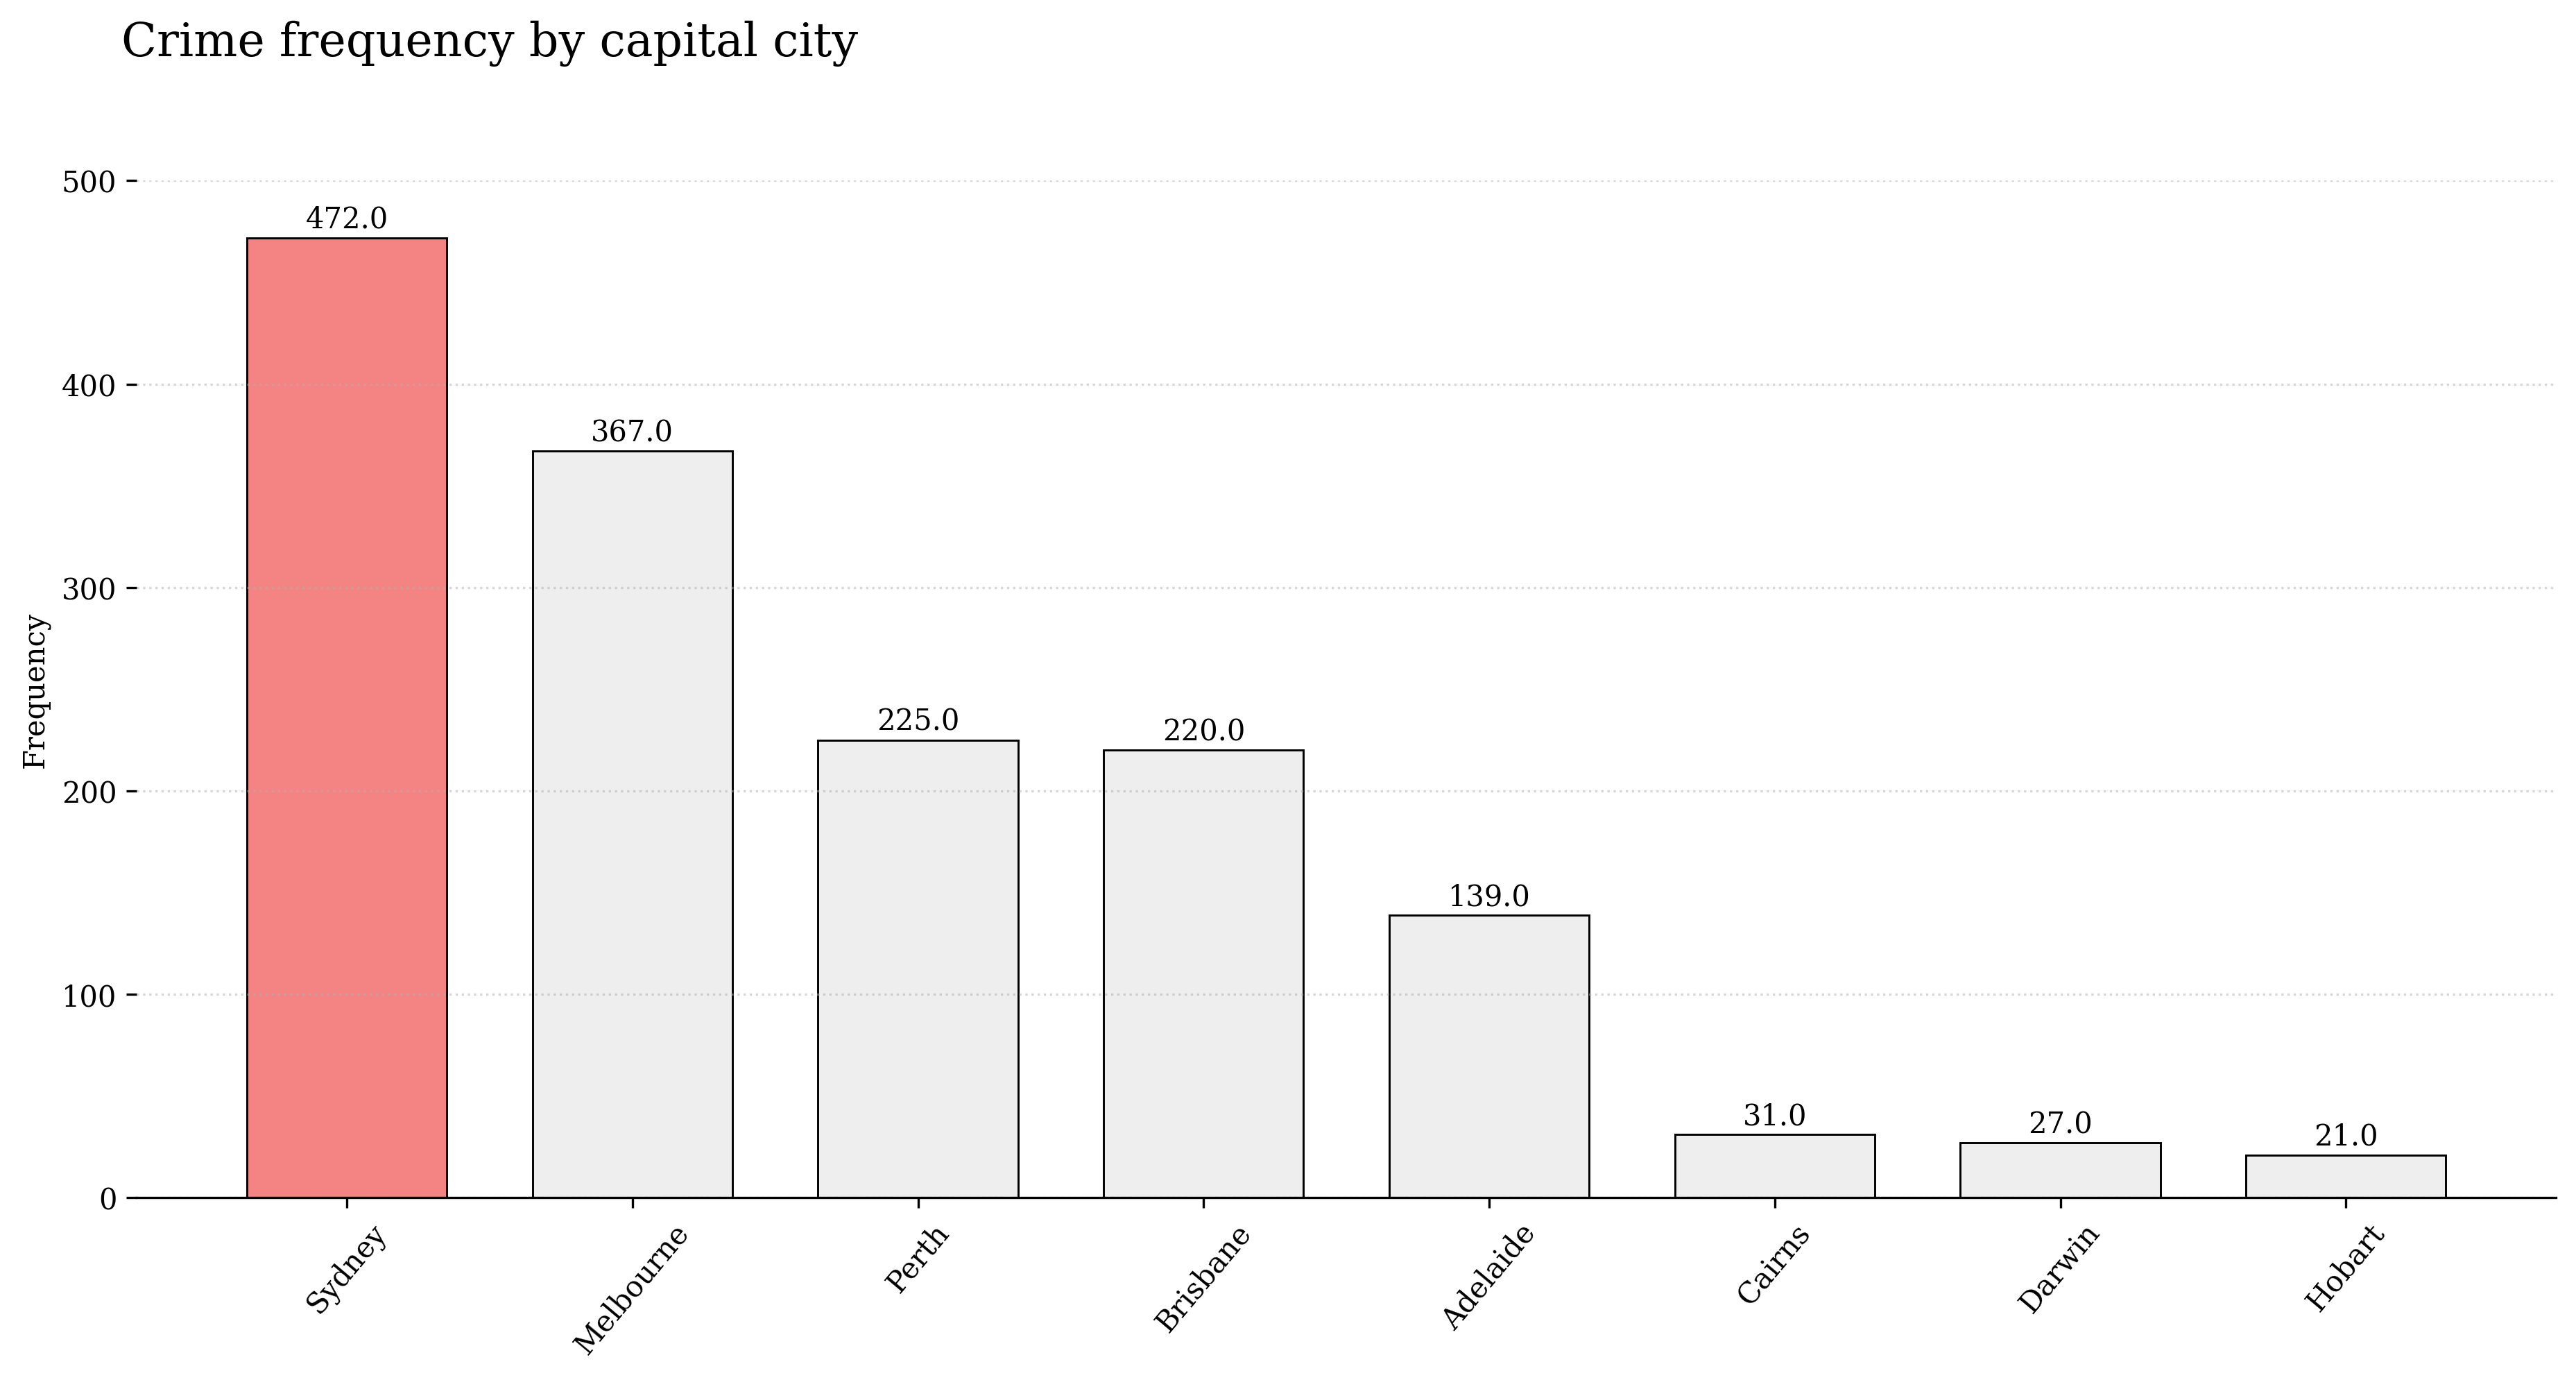

In [239]:
crime_frequency = data.drop(columns=['Case Incident Type','National','Total']).sum().to_dict()
crime_frequency = dict(reversed(sorted(crime_frequency.items(), key=lambda x: x[1])))

city_colors = [
    "#F48484", 
    "#EEEEEE", 
    "#EEEEEE", 
    "#EEEEEE", 
    "#EEEEEE", 
    "#EEEEEE", 
    "#EEEEEE", 
    "#EEEEEE"  
]

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(crime_frequency.keys(), crime_frequency.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in crime_frequency.keys():
    ax.annotate(f"{crime_frequency[i]}", 
                   xy=(i, crime_frequency[i] + 9),
                   va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Frequency')
plt.ylim(0,500)
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Crime frequency by capital city",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

In [240]:
"""
Since the crime frequency dataset was published in 2013, 
we will use the population of the cities in 2013 for the calculations.
"""

city_population = {
    'Sydney': 3908643, 
    'Melbourne': 3707529, 
    'Brisbane': 1874426, 
    'Adelaide': 1103979, 
    'Perth': 1627576, 
    'Hobart': 170977, 
    'Darwin': 103017, 
    'Canberra': 391473, 
    'Cairns': 133891
}

crime_rate = {}
for city in crime_frequency:
    crime_rate[city] = round((crime_frequency[city] / city_population[city] * 100000), 2)

crime_rate = dict(reversed(sorted(crime_rate.items(), key=lambda x: x[1])))

<a id="section-2"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>2. Crime rate by Capital City</b></h1>
</div>

<div style="font-family: Serif">
<p>When analysing the crime frequency data, it was observed that there was a change in the relative ranking of cities when the crime frequency was converted to the crime rate per 100,000 people. Initially, Sydney had the highest crime frequency (472 incidents) and Melbourne had the second highest crime frequency (367 incidents). However, upon conversion to the crime rate per 100,000 people, it was found that Darwin had the highest crime rate (26.21 incidents per 100,000 people) and Cairns had the second highest crime rate (23.15 incidents per 100,000 people). It was also observed that Sydney and Melbourne had relatively similar crime rates (12.08 and 9.9 incidents per 100,000 people respectively) when compared to the other cities.</p>
    
<p>It is important to consider the population size when analysing crime data as the population size can greatly affect the crime rate. The crime rate per 100,000 people is considered to be a more accurate measure for comparing the crime rate of different cities and countries. This measure revealed that Darwin and Cairns had much higher crime rates as compared to the other cities, thus it is important to consider when analysing crime trends in Australia.</p>
</div>    


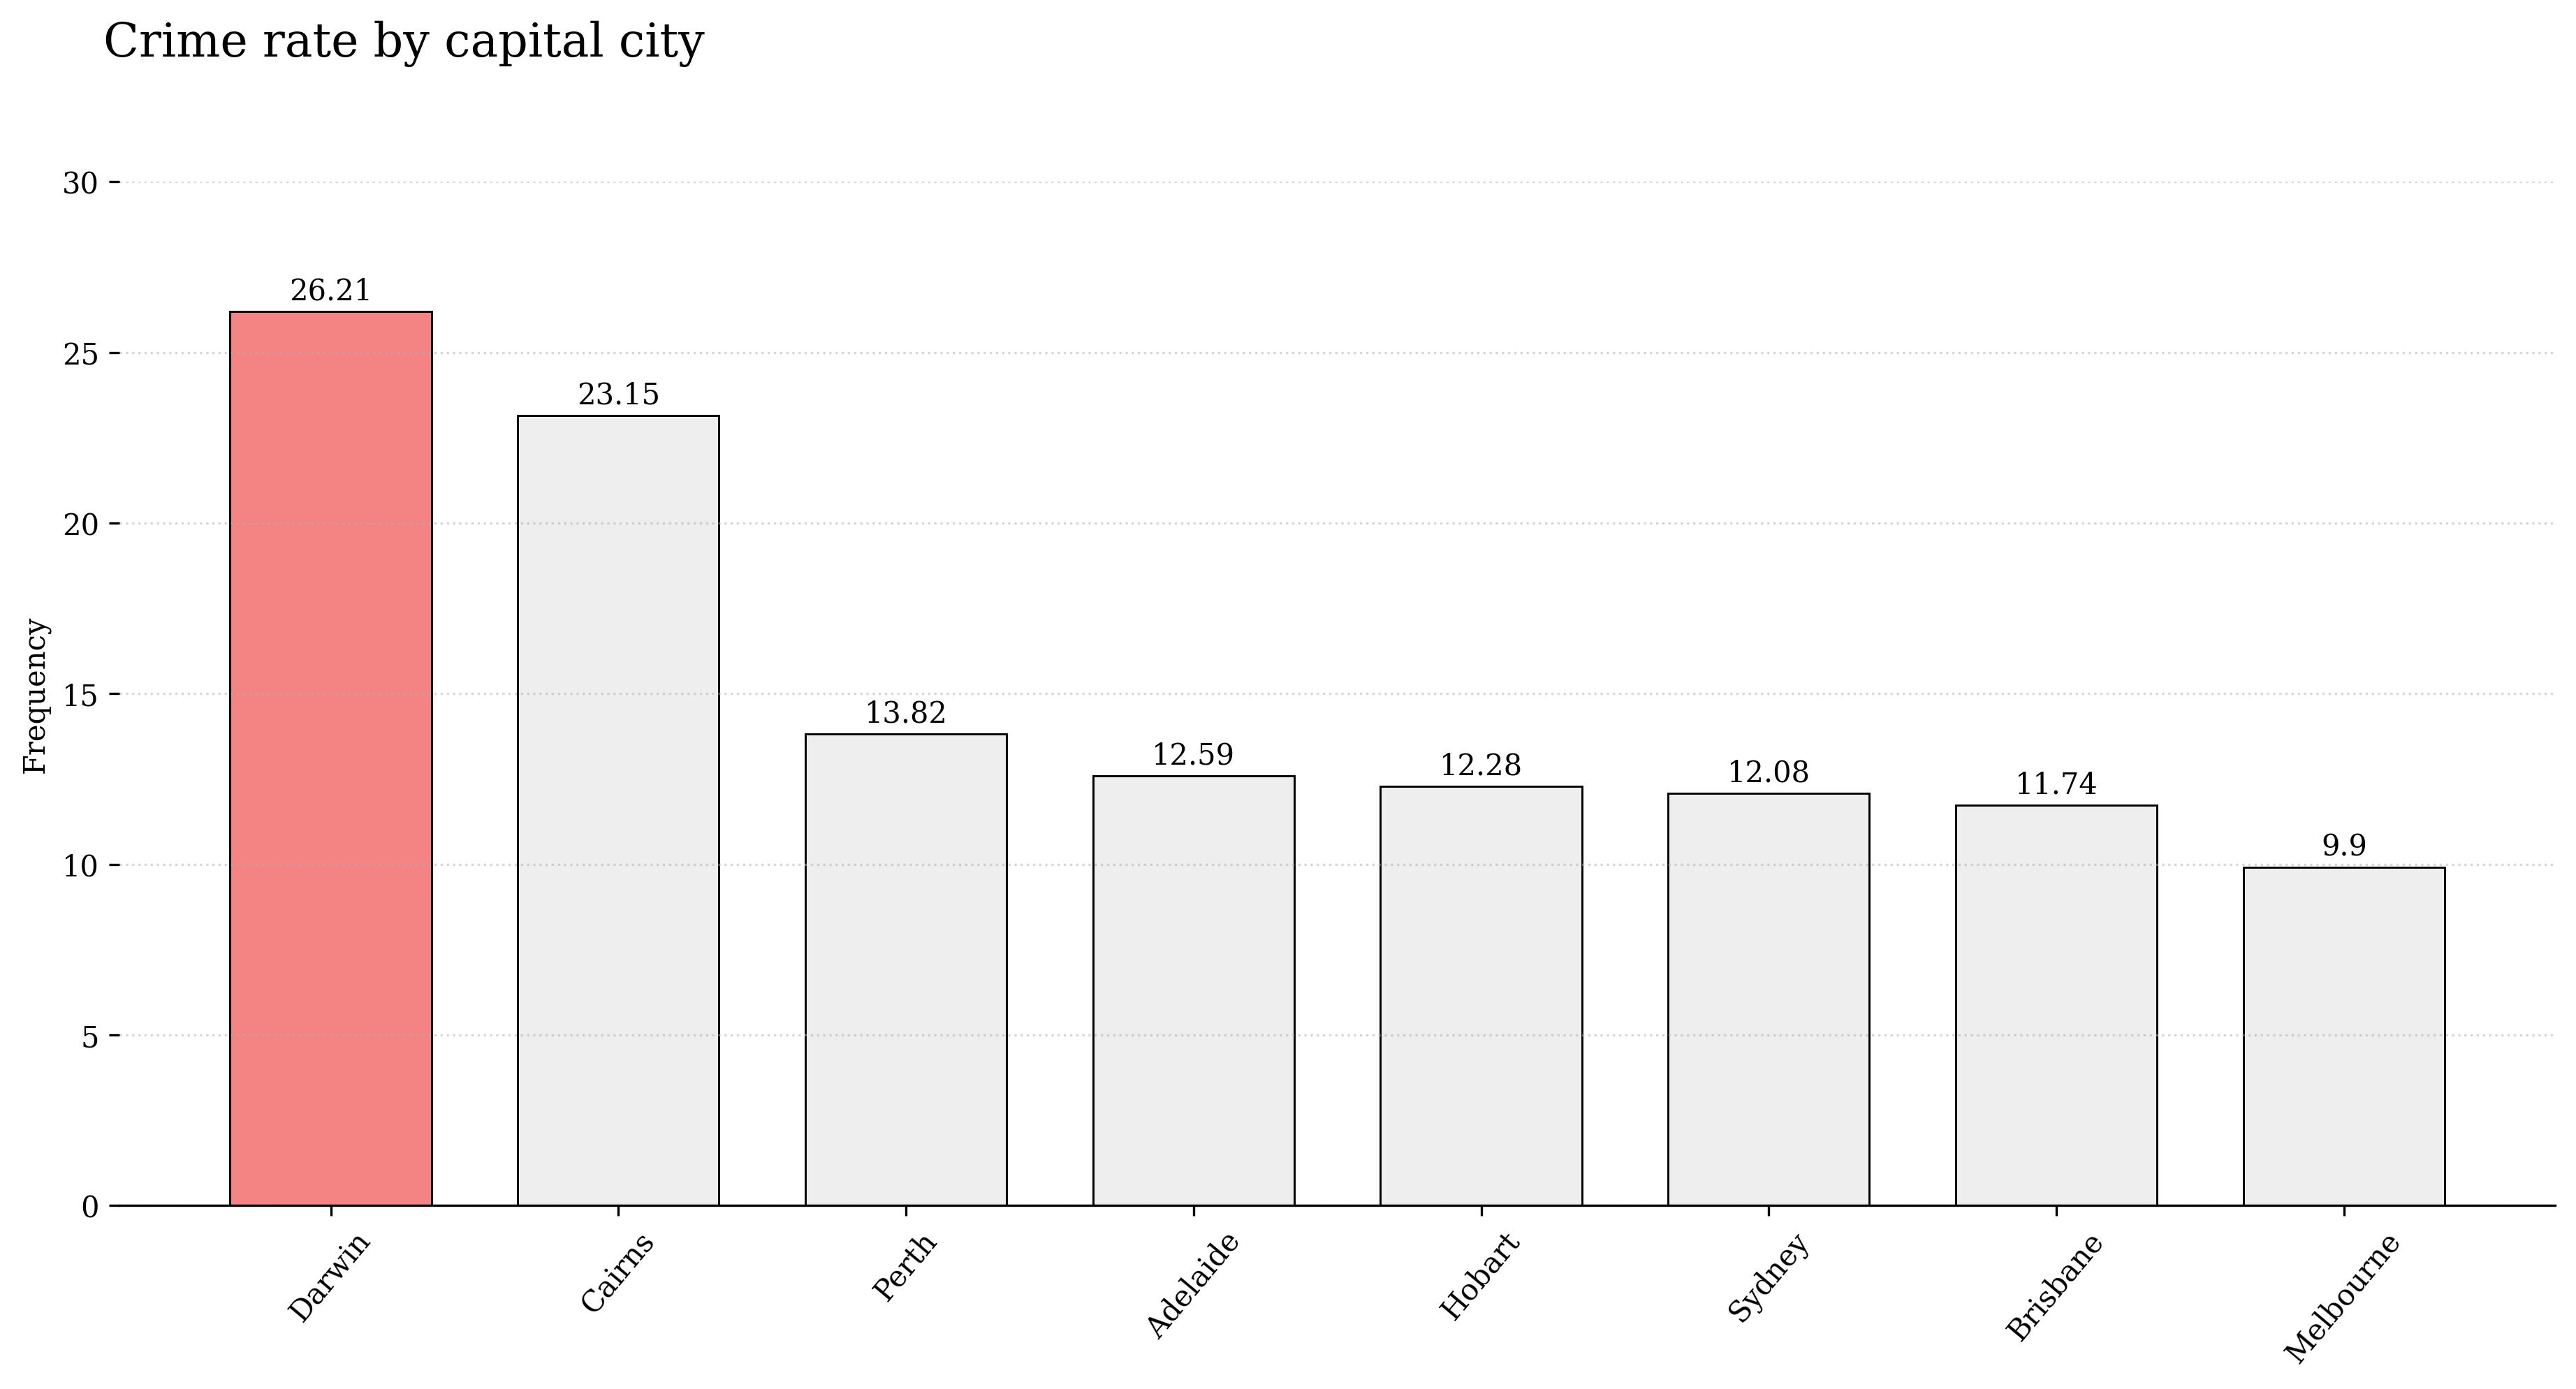

In [241]:
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])


ax.bar(crime_rate.keys(), crime_rate.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in crime_rate.keys():
    ax.annotate(f"{crime_rate[i]}", 
                   xy=(i, crime_rate[i] + 0.6),
                   va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Frequency')
plt.ylim(0,30)
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Crime rate by capital city",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-3"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>3. Top 10 most frequent crimes</b></h1>
</div>

<div style="font-family: Serif">
<p>The data presented in the visual representation below pertains to the frequency of various types of crimes that occurred in Australia in the year 2013. A thorough analysis of the data reveals that the most prevalent forms of crimes were related to child sex offenses and fraud. Specifically, the crimes of 'Child Sex Offences - Online Child Sex Exploitation', 'Fraud' and 'Transnational − Child Sex Tourism' exhibited the highest frequencies among the crimes listed, with 'Drugs − Imported' having the highest overall frequency.</p>

<p>It is noteworthy that certain crimes such as 'Corruption' and 'Identity Crime' displayed similar frequencies, which are relatively low in comparison to the other crimes listed. Additionally, 'Information And Communications Technology' and 'People Smuggling' also displayed lower frequencies.</p>

<p>The next step in this analysis would be to examine the distribution of these top 10 most frequent crimes across the different capital cities in Australia, to gain a better understanding of the specific cities that are most affected by these crimes per 100,000 people.</p>
    
</div>

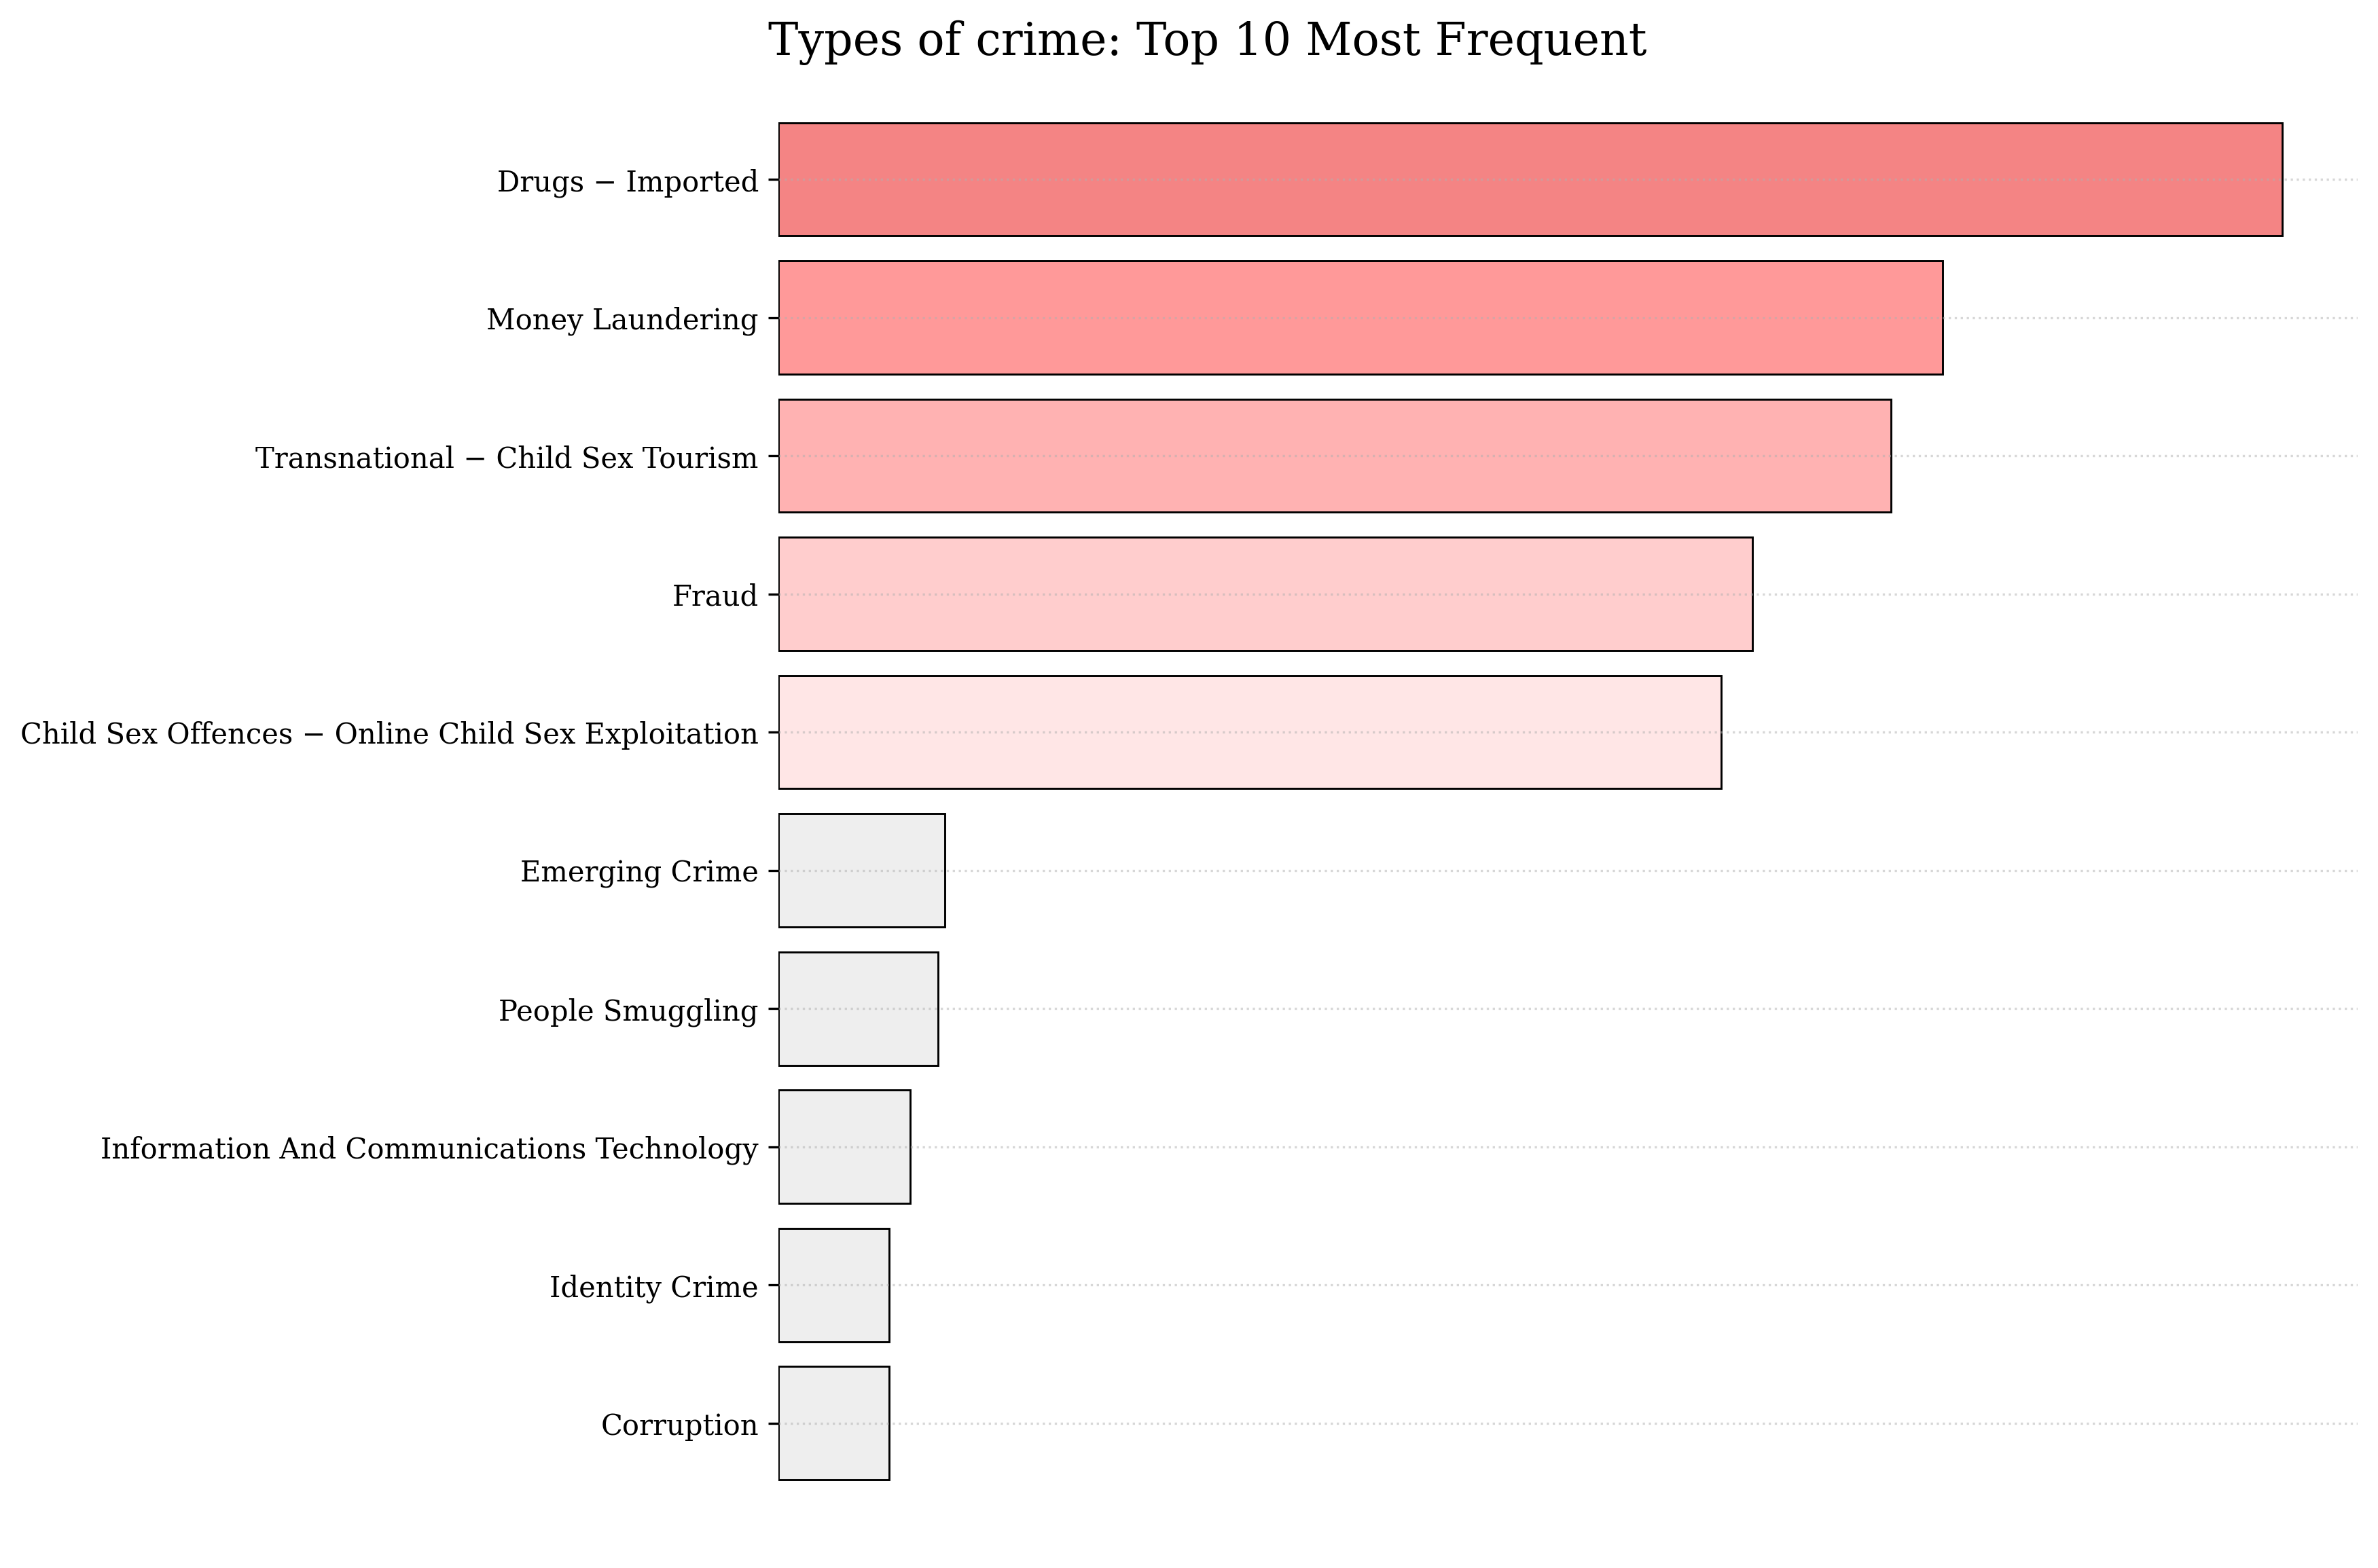

In [242]:
case_incident_type = data.groupby('Case Incident Type')['Total'].sum().sort_values(ascending=False)[:10]
case_incident_type = case_incident_type.sort_values(ascending=True).to_dict()

fig = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

colors = ['#F48484', '#FF9999', '#FFB2B2', '#FFCDCD', '#FFE6E6'] + ['#EEEEEE' for i in range(len(case_incident_type)-5)]

ax.barh(list(case_incident_type.keys()), list(case_incident_type.values()), height=0.82, edgecolor='black', color=list(reversed(colors)), linewidth=0.7)

for s in ['top', 'right','left','bottom']:
    ax.spines[s].set_visible(False)
    
plt.yticks(rotation=0)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.88, s="Types of crime: Top 10 Most Frequent",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.xticks([])
plt.show()

In [243]:
case_incident_keys = list(case_incident_type.keys())
case_incident_data = data[data['Case Incident Type'].isin(case_incident_keys)] 

def extract_data(case_incident_data, incident_type, city_population):
    extracted_data = case_incident_data[case_incident_data['Case Incident Type'] == incident_type]
    extracted_data.drop(columns=['National','Total'],inplace=True)
    # getting rate per 100k
    rate_per_100k = {}
    
    for city in extracted_data:
        if city == 'Case Incident Type':
            continue
        else:
            rate_per_100k[city] = round(extracted_data[city] / city_population[city] * 100000,2)
        
    rate_per_100k = pd.DataFrame(rate_per_100k)
    
    rate_per_100k = rate_per_100k.to_dict()
    
    for city in rate_per_100k:
        rate_per_100k[city] = list(rate_per_100k[city].values())[0]
    
    return rate_per_100k

<a id="section-4"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>4. Drugs − Imported by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>The data provided shows the rate of "Drugs − Imported" per 100,000 population for each capital city in Australia. "Drugs − Imported" refers to illegal drugs that have been brought into the country from another location.</p>

<p>From the data provided, Darwin has the highest rate of "Drugs − Imported" at 9.71 per 100,000 population. It is important to note that Darwin is geographically the closest capital city to other countries in Southeast Asia, which is a known region for drug trafficking. This proximity may contribute to the higher rate of "Drugs − Imported" in Darwin compared to other capital cities. Melbourne has the second highest rate at 3.26 per 100,000 population, and it is worth noting that in 2020, there were several high-profile drug busts in Melbourne related to imported drugs. On the other hand, Adelaide and Hobart have the lowest rates of "Drugs − Imported" at 0.82 and 0 per 100,000 population respectively.</p>
    
</div>

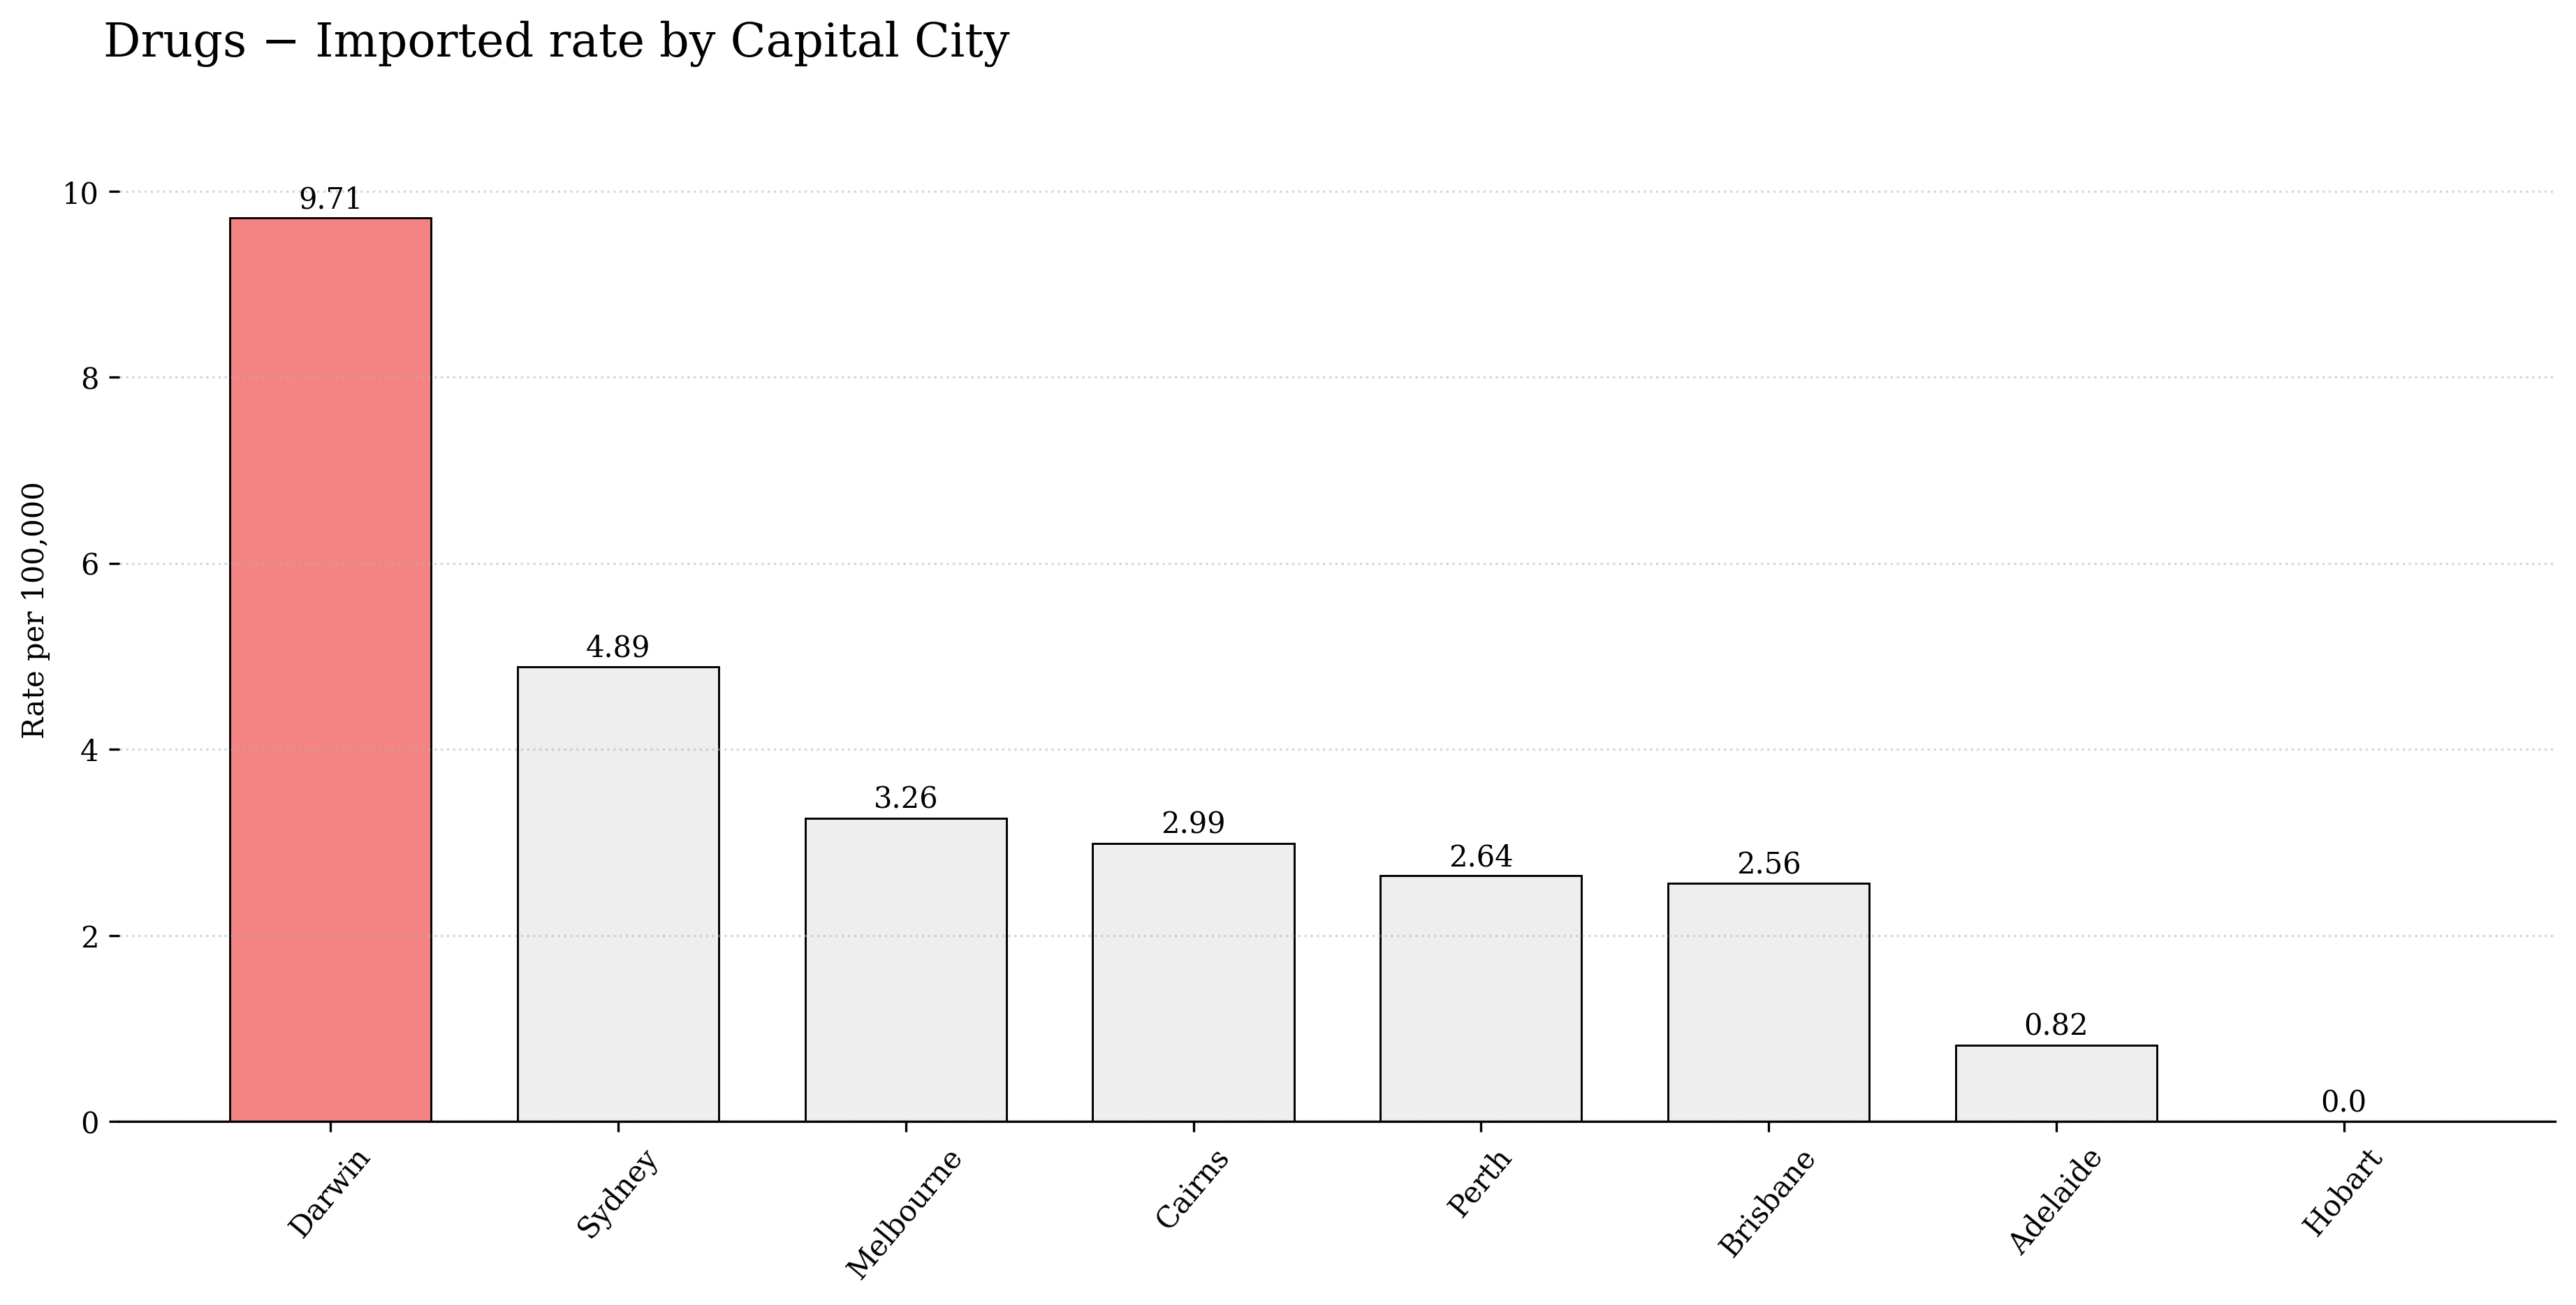

In [244]:
drugs_imported_data = extract_data(case_incident_data, 'Drugs − Imported', city_population)
drugs_imported_data = dict(reversed(sorted(drugs_imported_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(drugs_imported_data.keys(), drugs_imported_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in drugs_imported_data.keys():
    ax.annotate(f"{drugs_imported_data[i]}", xy=(i, drugs_imported_data[i] + 0.2),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.ylim(0,11)
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.90, s="Drugs − Imported rate by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-5"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>5. People Smuggling by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>Based on visualisation below, the mean rate of people smuggling per 100,000 in Australia is 0.48. The median rate is 0.09, which indicates that half of the cities have a rate at or below this value. The minimum rate is 0.0, which is found in Hobart, Brisbane and the maximum rate is 1.94, which is found in Darwin. The standard deviation is 0.68, which indicates that the data points are relatively spread out around the mean. It is important to note that this data only provides the rate of people smuggling per 100,000 in these cities, and does not take into account other factors such as population or law enforcement that may influence the rate of this crime.</p>
    
<p>People smuggling refers to the illegal transportation of individuals across international borders, typically for the purpose of seeking asylum or for financial gain. In Australia, people smuggling has a long history dating back to the late 1800s and early 1900s, when large numbers of immigrants were brought to the country as part of government-funded schemes to populate the continent. However, in the late 20th century and early 21st century, people smuggling has become associated with the illegal transportation of refugees and asylum seekers to Australia by boat. This has been a contentious issue in Australia and has led to a number of government policies and initiatives aimed at deterring and preventing people smuggling.</p>
</div>

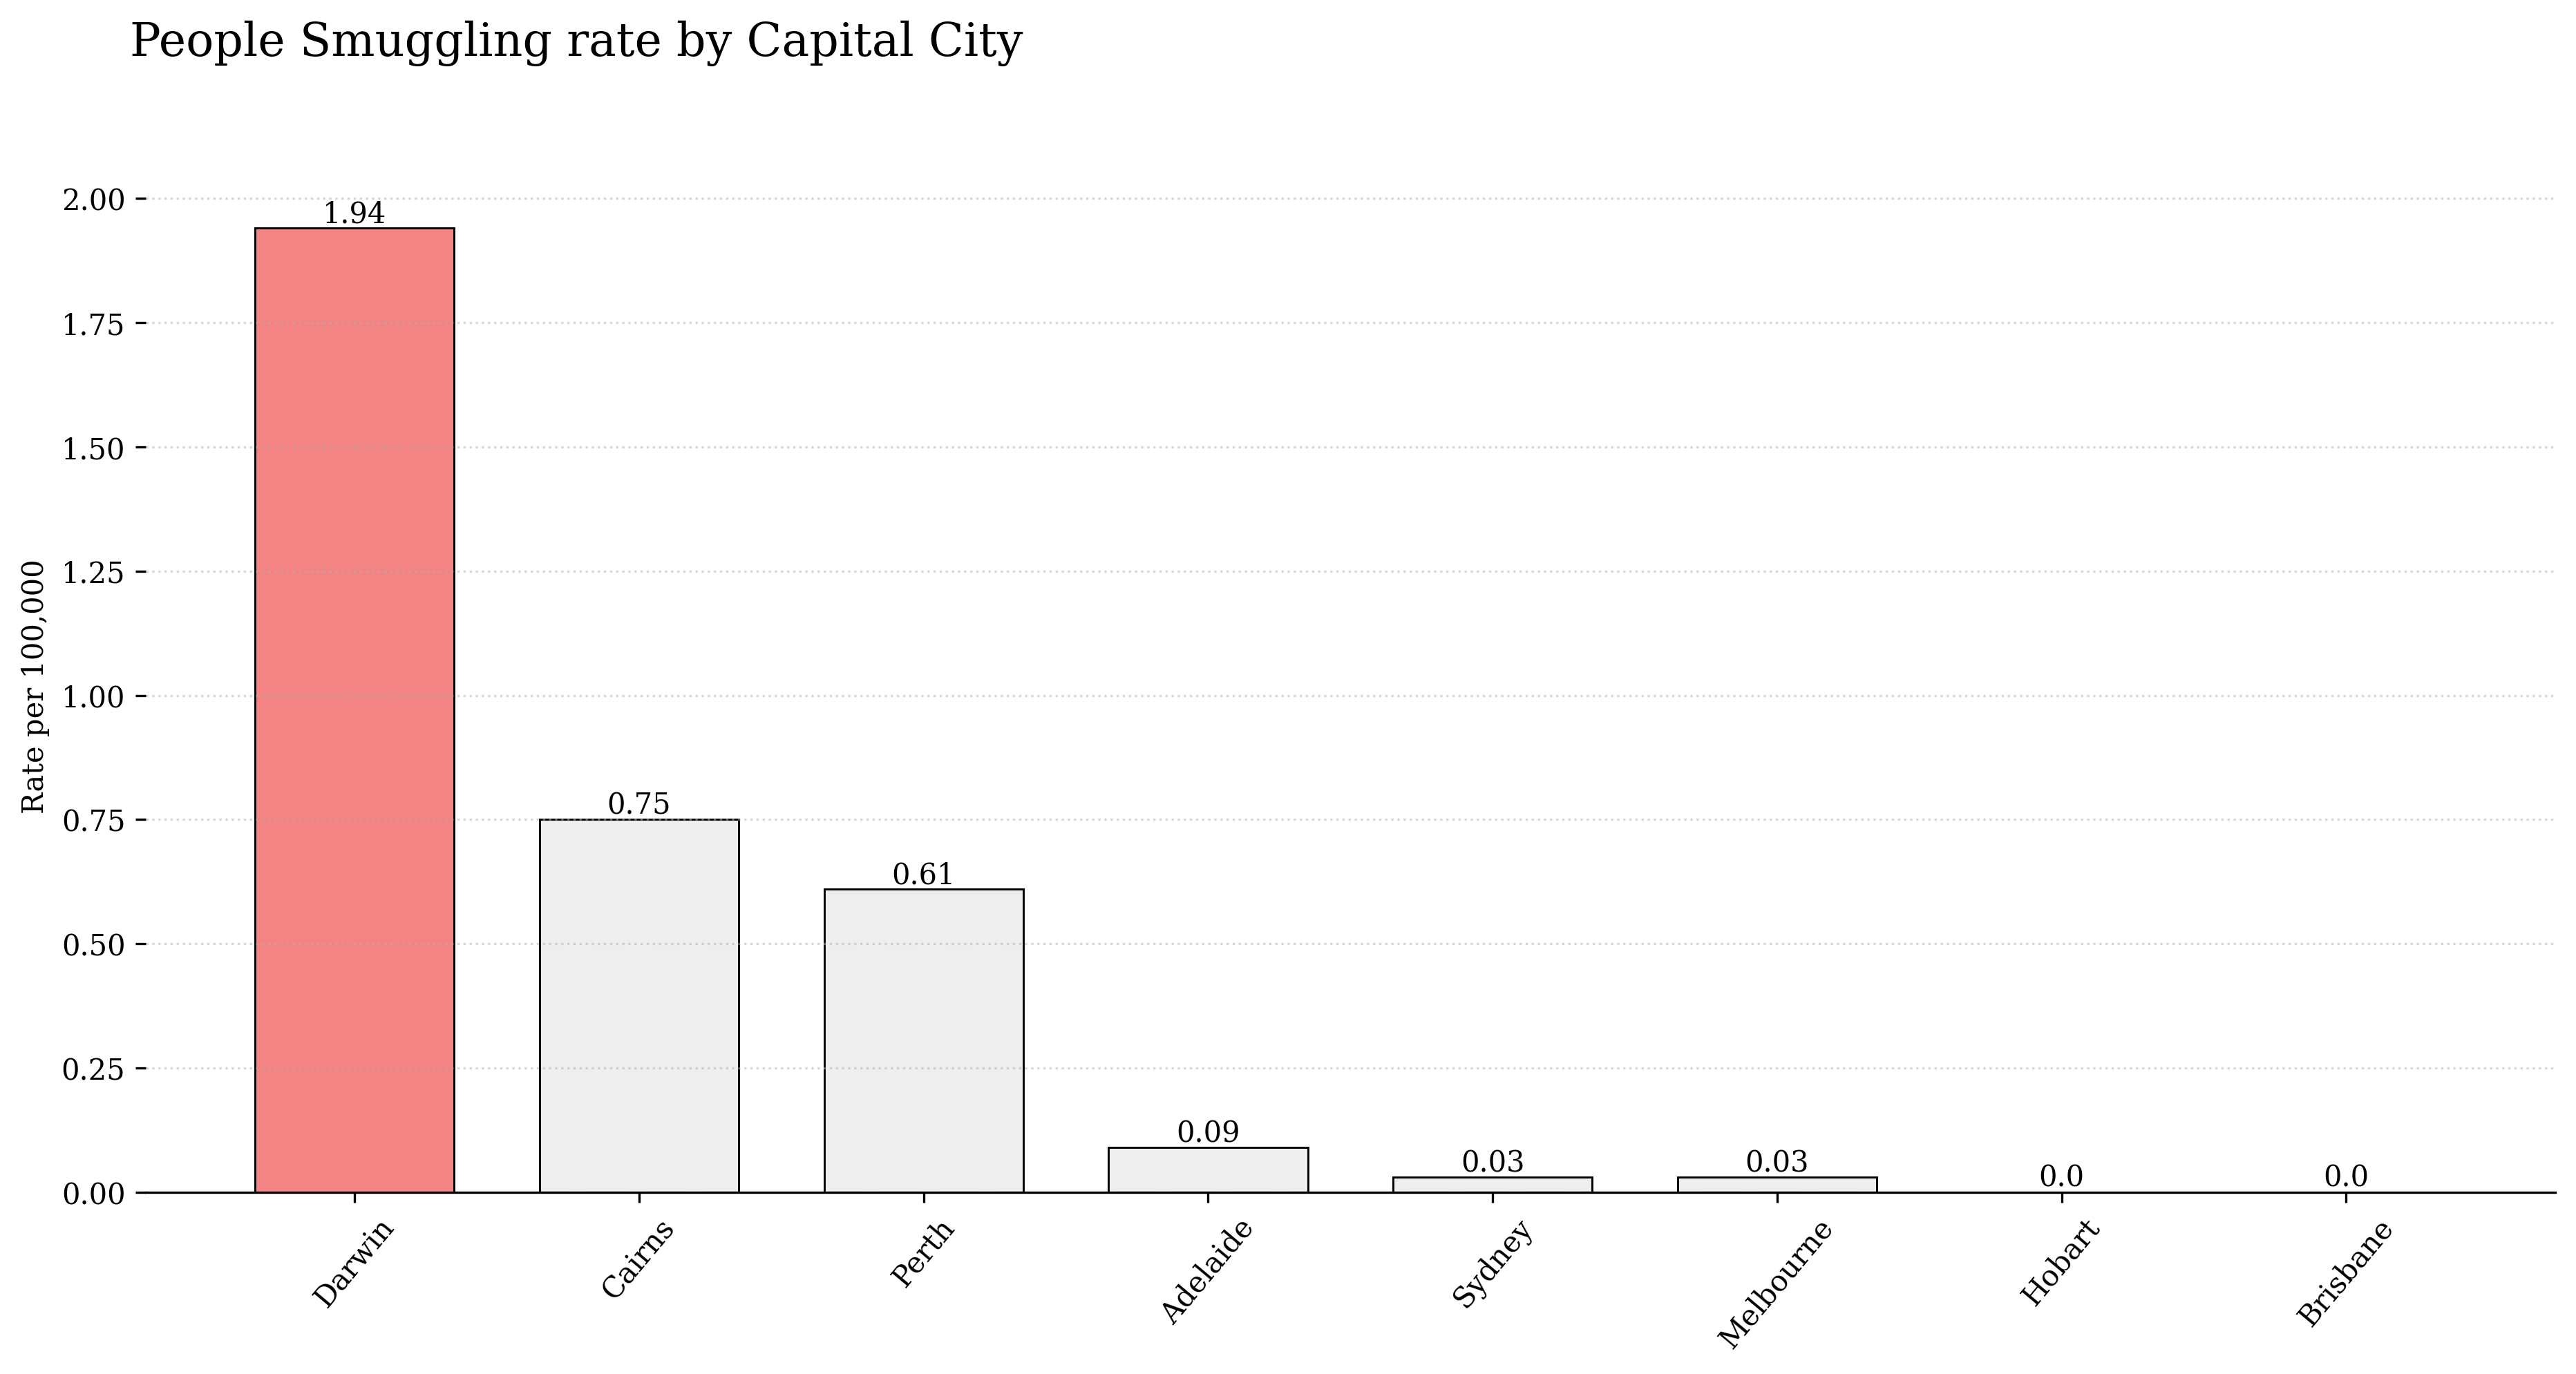

In [245]:
people_smuggling_data = extract_data(case_incident_data, 'People Smuggling', city_population)
people_smuggling_data = dict(reversed(sorted(people_smuggling_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(people_smuggling_data.keys(), people_smuggling_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in people_smuggling_data.keys():
    ax.annotate(f"{people_smuggling_data[i]}", xy=(i, people_smuggling_data[i] + 0.029),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="People Smuggling rate by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-6"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>6. Corruption by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>This visualisation below reflects the rate of corruption per 100,000 in various capital cities in Australia. The mean rate of corruption is 0.26. The median rate is 0.13, which indicates that half of the cities have a rate at or below this value. The minimum rate is 0.11, which is found in Brisbane and the maximum rate is 0.97, which is found in Darwin. The standard deviation is 0.27, which indicates that the data points are relatively close to the mean.</p>

<p>It can be observed that the rate of corruption varies among the cities, with Cairns and Darwin having the highest rates at 0.75 and 0.97 respectively. It is important to note that this data only provides the rate of corruption per 100,000 in these cities, and does not take into account other factors such as population or law enforcement that may influence the rate of this crime.</p>

<p>It is difficult to determine the specific reasons for the high rate of corruption in Darwin without more context and additional data. Factors such as the economic and political climate, level of transparency and accountability, and cultural attitudes towards corruption may all play a role. It would be beneficial to conduct further research and analysis in order to understand the underlying causes of the high rate of corruption in Darwin in 2013.</p>
</div>

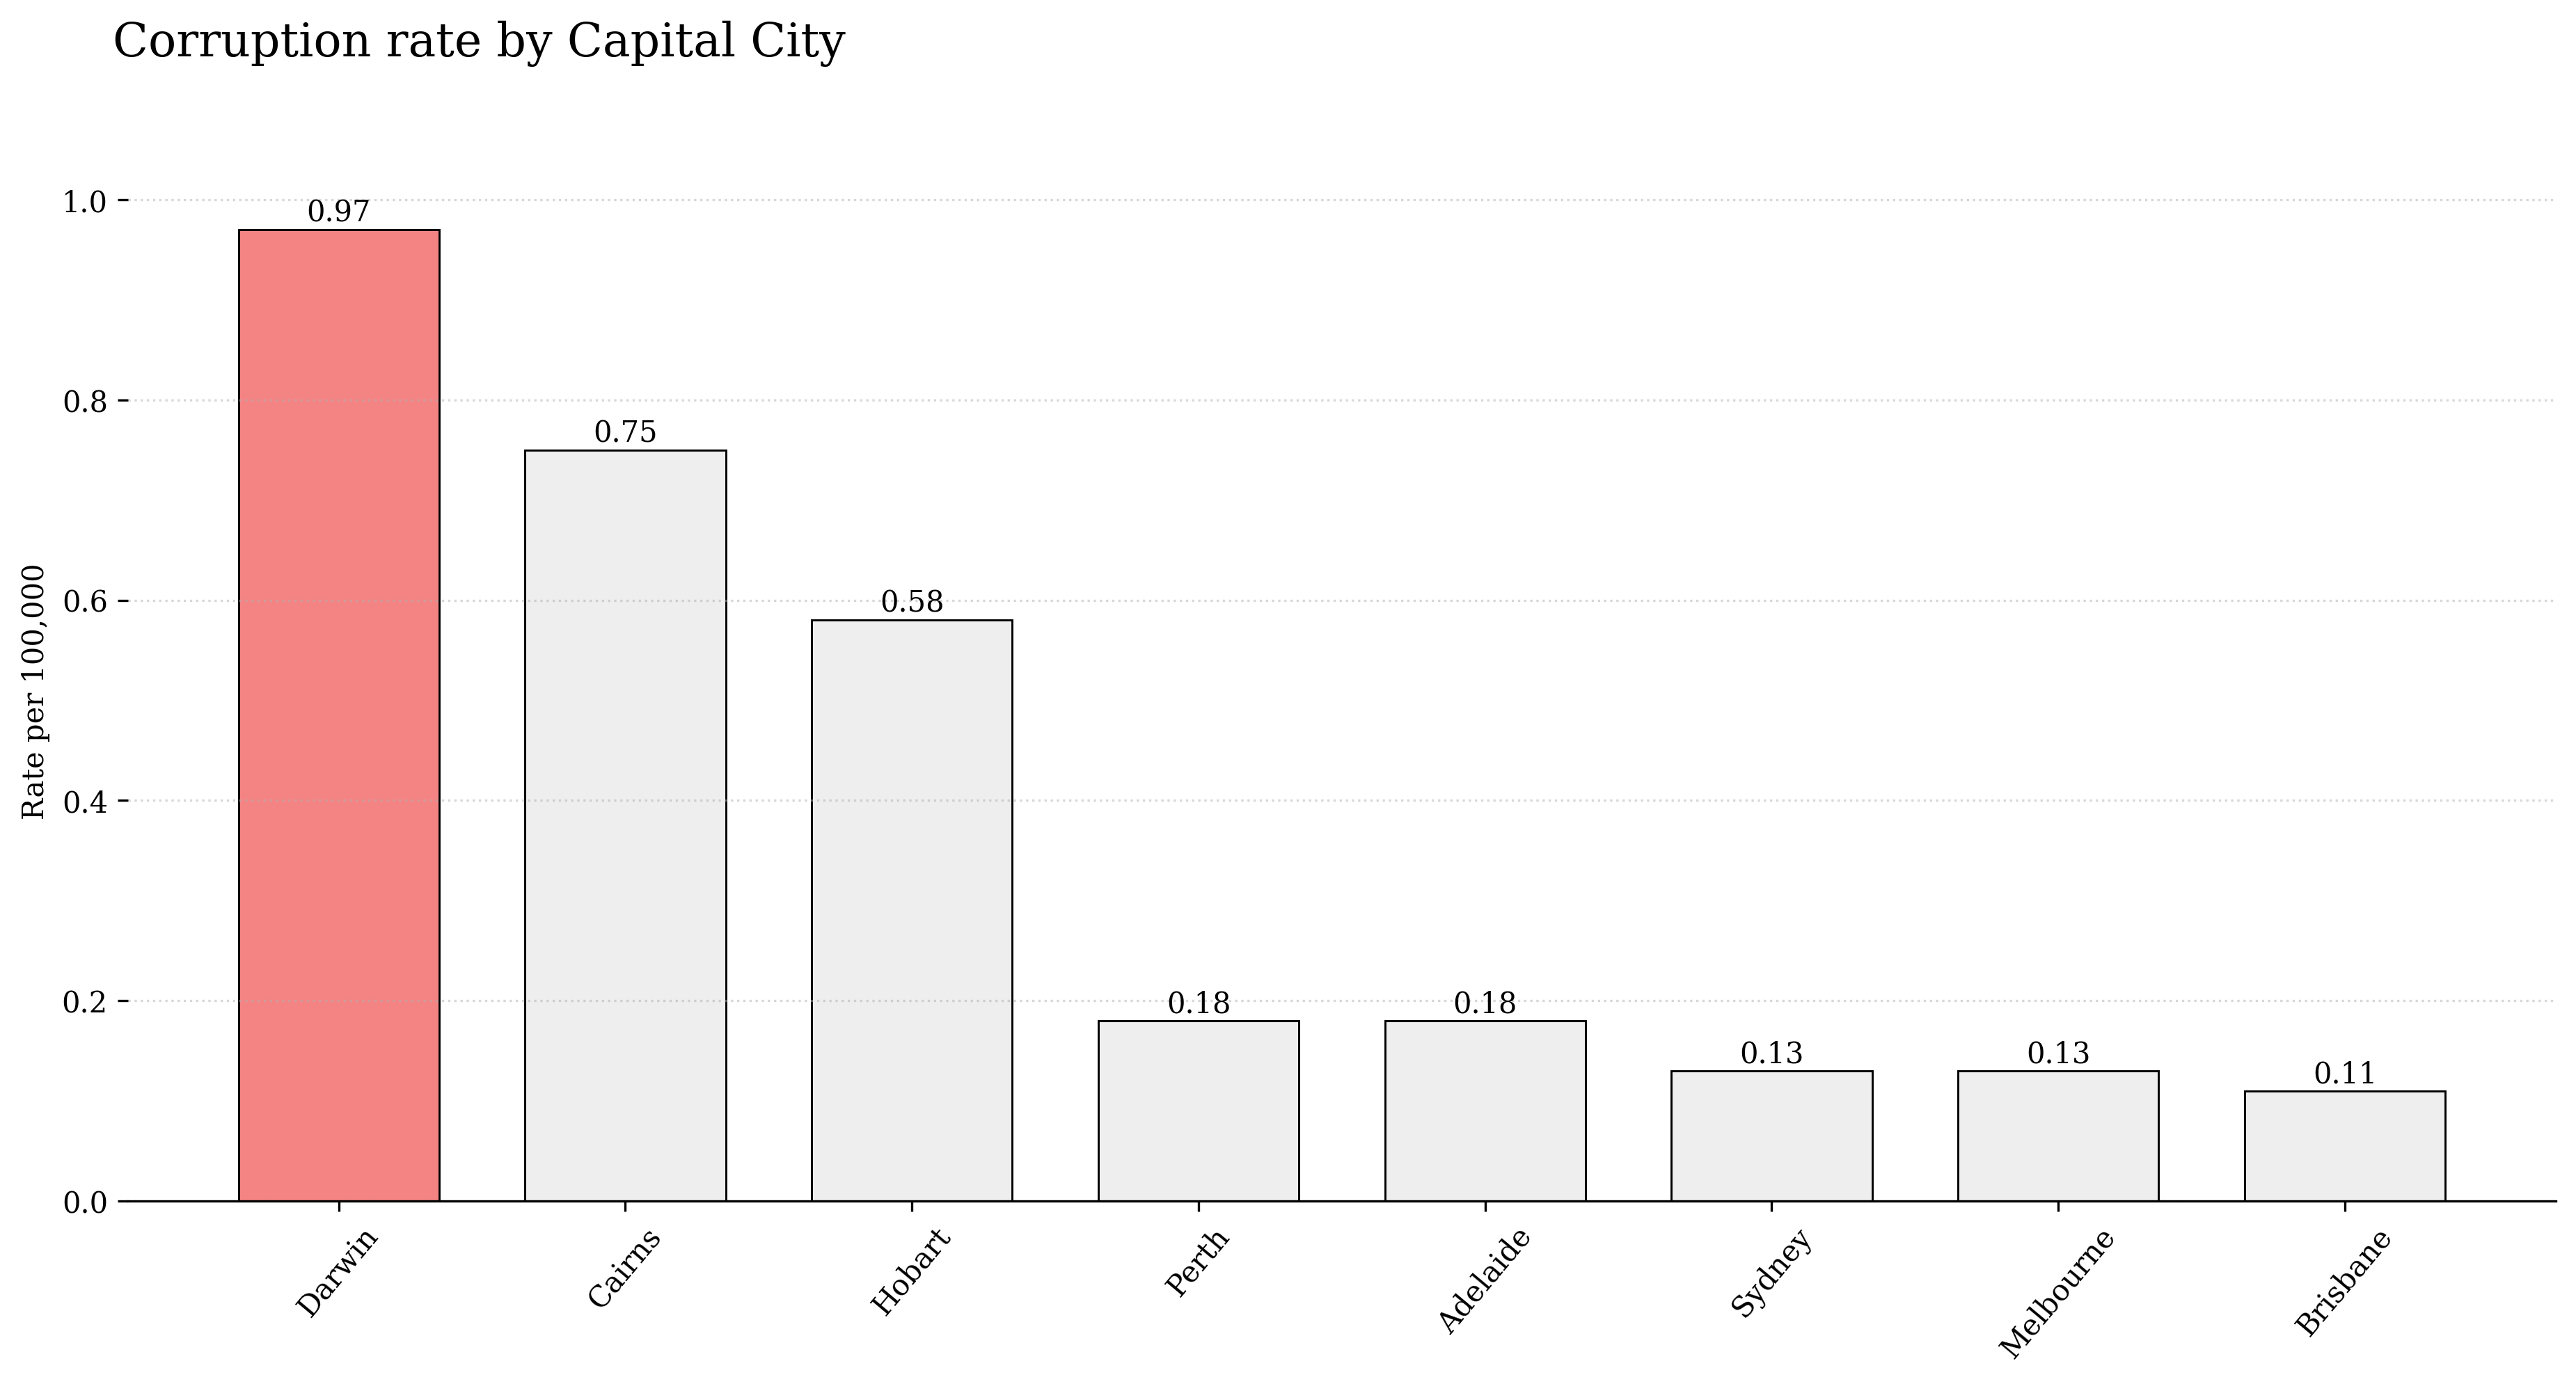

In [246]:
corruption_data = extract_data(case_incident_data, 'Corruption', city_population)
corruption_data = dict(reversed(sorted(corruption_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(corruption_data.keys(), corruption_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in corruption_data.keys():
    ax.annotate(f"{corruption_data[i]}", xy=(i, corruption_data[i] + 0.017),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Corruption rate by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-7"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>7. Information And Communications Technology by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>The visualisation below shows us the rate of Information And Communications Technology (ICT) crime per 100,000 in various cities in Australia. From the data, it is evident that the rates of ICT crime vary greatly among the cities. The mean rate of ICT crime is 0.81 per 100,000, the median rate is 0.18, which indicates that half of the cities have a rate at or below this value. The minimum rate is 0.0, which is found in Adelaide and Cairns, and the maximum rate is 2.91, which is found in Darwin. The standard deviation is 1.24, which indicates that the data points are relatively spread out around the mean.</p>

<p>It is worth noting that the rate of ICT crime is 0 in Adelaide and Cairns, whereas it is relatively high in Darwin. It would be useful to have more context on why these rates differ. The high rate in Darwin might be due to a lack of awareness about the importance of cyber security or lack of effective measures to prevent such crimes in the city.</p>
</div>

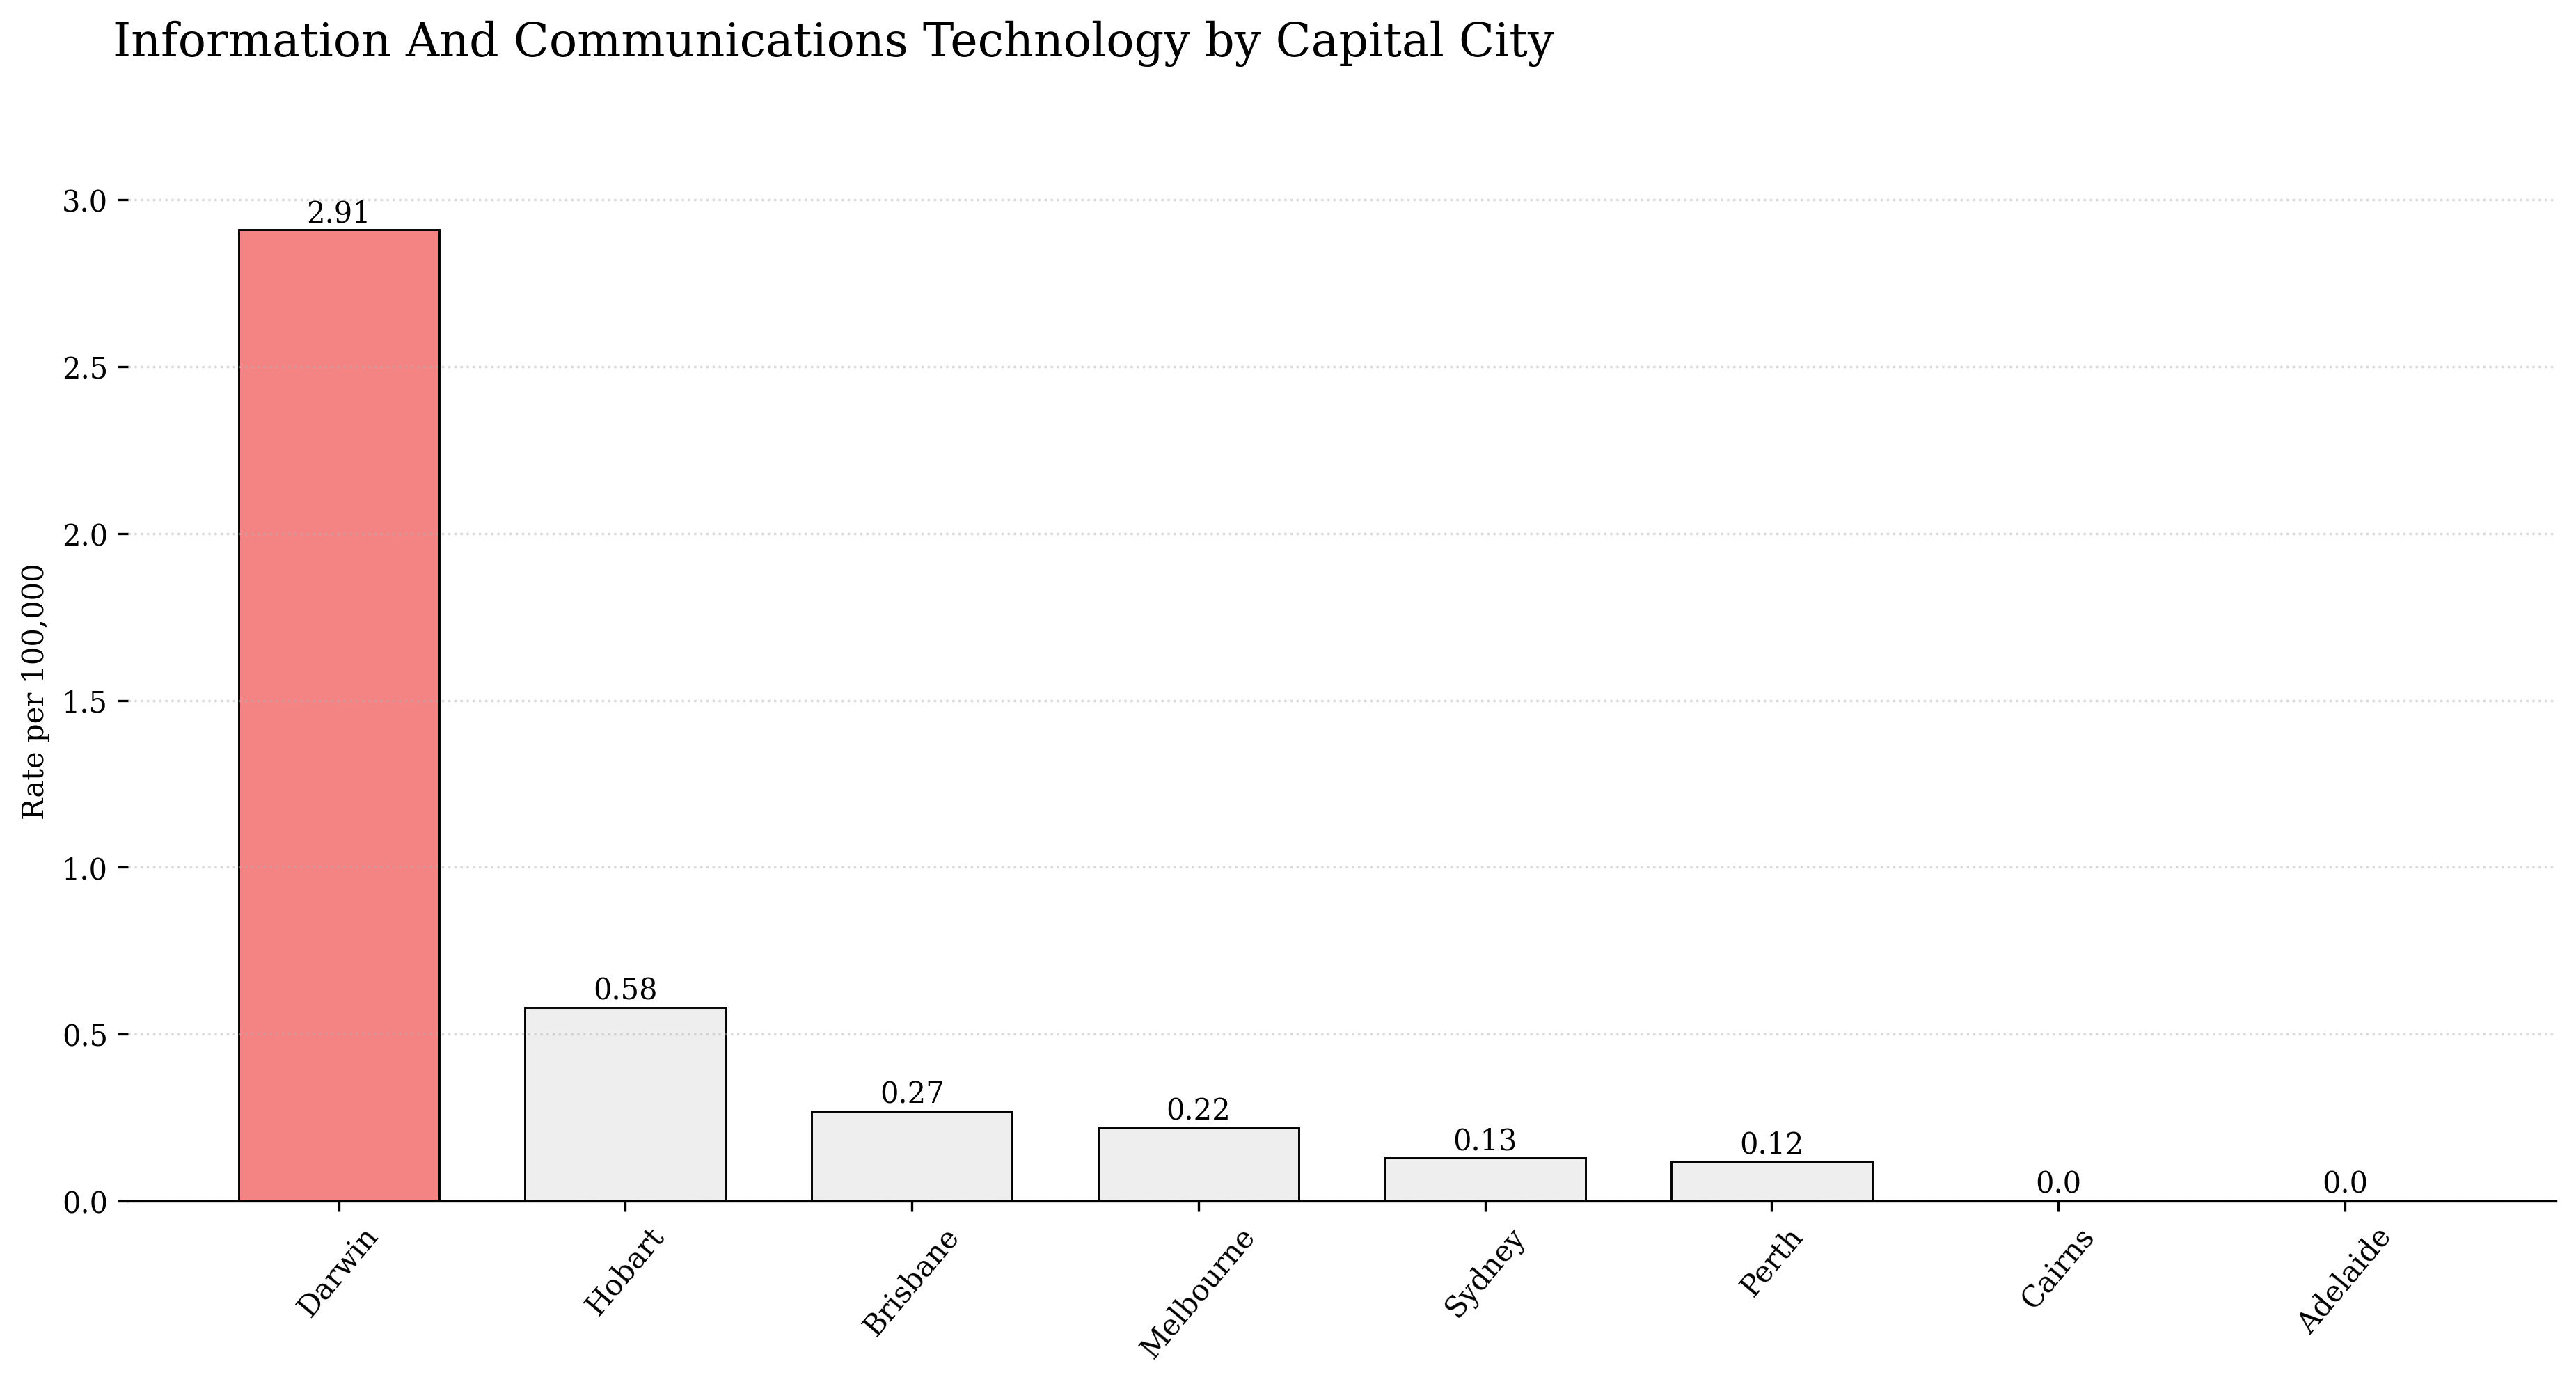

In [247]:
info_comms_data = extract_data(case_incident_data, 'Information And Communications Technology', city_population)
info_comms_data = dict(reversed(sorted(info_comms_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(info_comms_data.keys(), info_comms_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in info_comms_data.keys():
    ax.annotate(f"{info_comms_data[i]}", xy=(i, info_comms_data[i] + 0.05),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Information And Communications Technology by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-8"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>8. Fraud by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>This visualisation below represents the rates of fraud per 100,000 people in various cities in Australia. From the data, it can be seen that the rates of fraud vary among the cities, with Hobart having the highest rate at 5.85, and Sydney having the lowest rate at 1.61.</p>

<p>Fraud is a broad category of crime that includes activities such as identity theft, pyramid schemes, and false advertising. In Australia, fraud has been a significant issue for decades. Some notable examples include the <a href="https://asic.gov.au/about-asic/news-centre/key-matters/storm-financial/">Storm Financial</a> case, where the company was accused of fraudulently convincing clients to invest in risky products, and the Winebox case, which involved tax evasion and money laundering. These types of fraud cases have been reported in various cities throughout the country.</p>

<p>It is important to note that this data only provides the rate of fraud per 100,000 people in these cities, and does not take into account other factors such as population or law enforcement that may influence the rate of this crime.</p>

<p>It can be inferred that Hobart has the highest rate of fraud, comparatively speaking, than the other cities listed.</p>
</div>

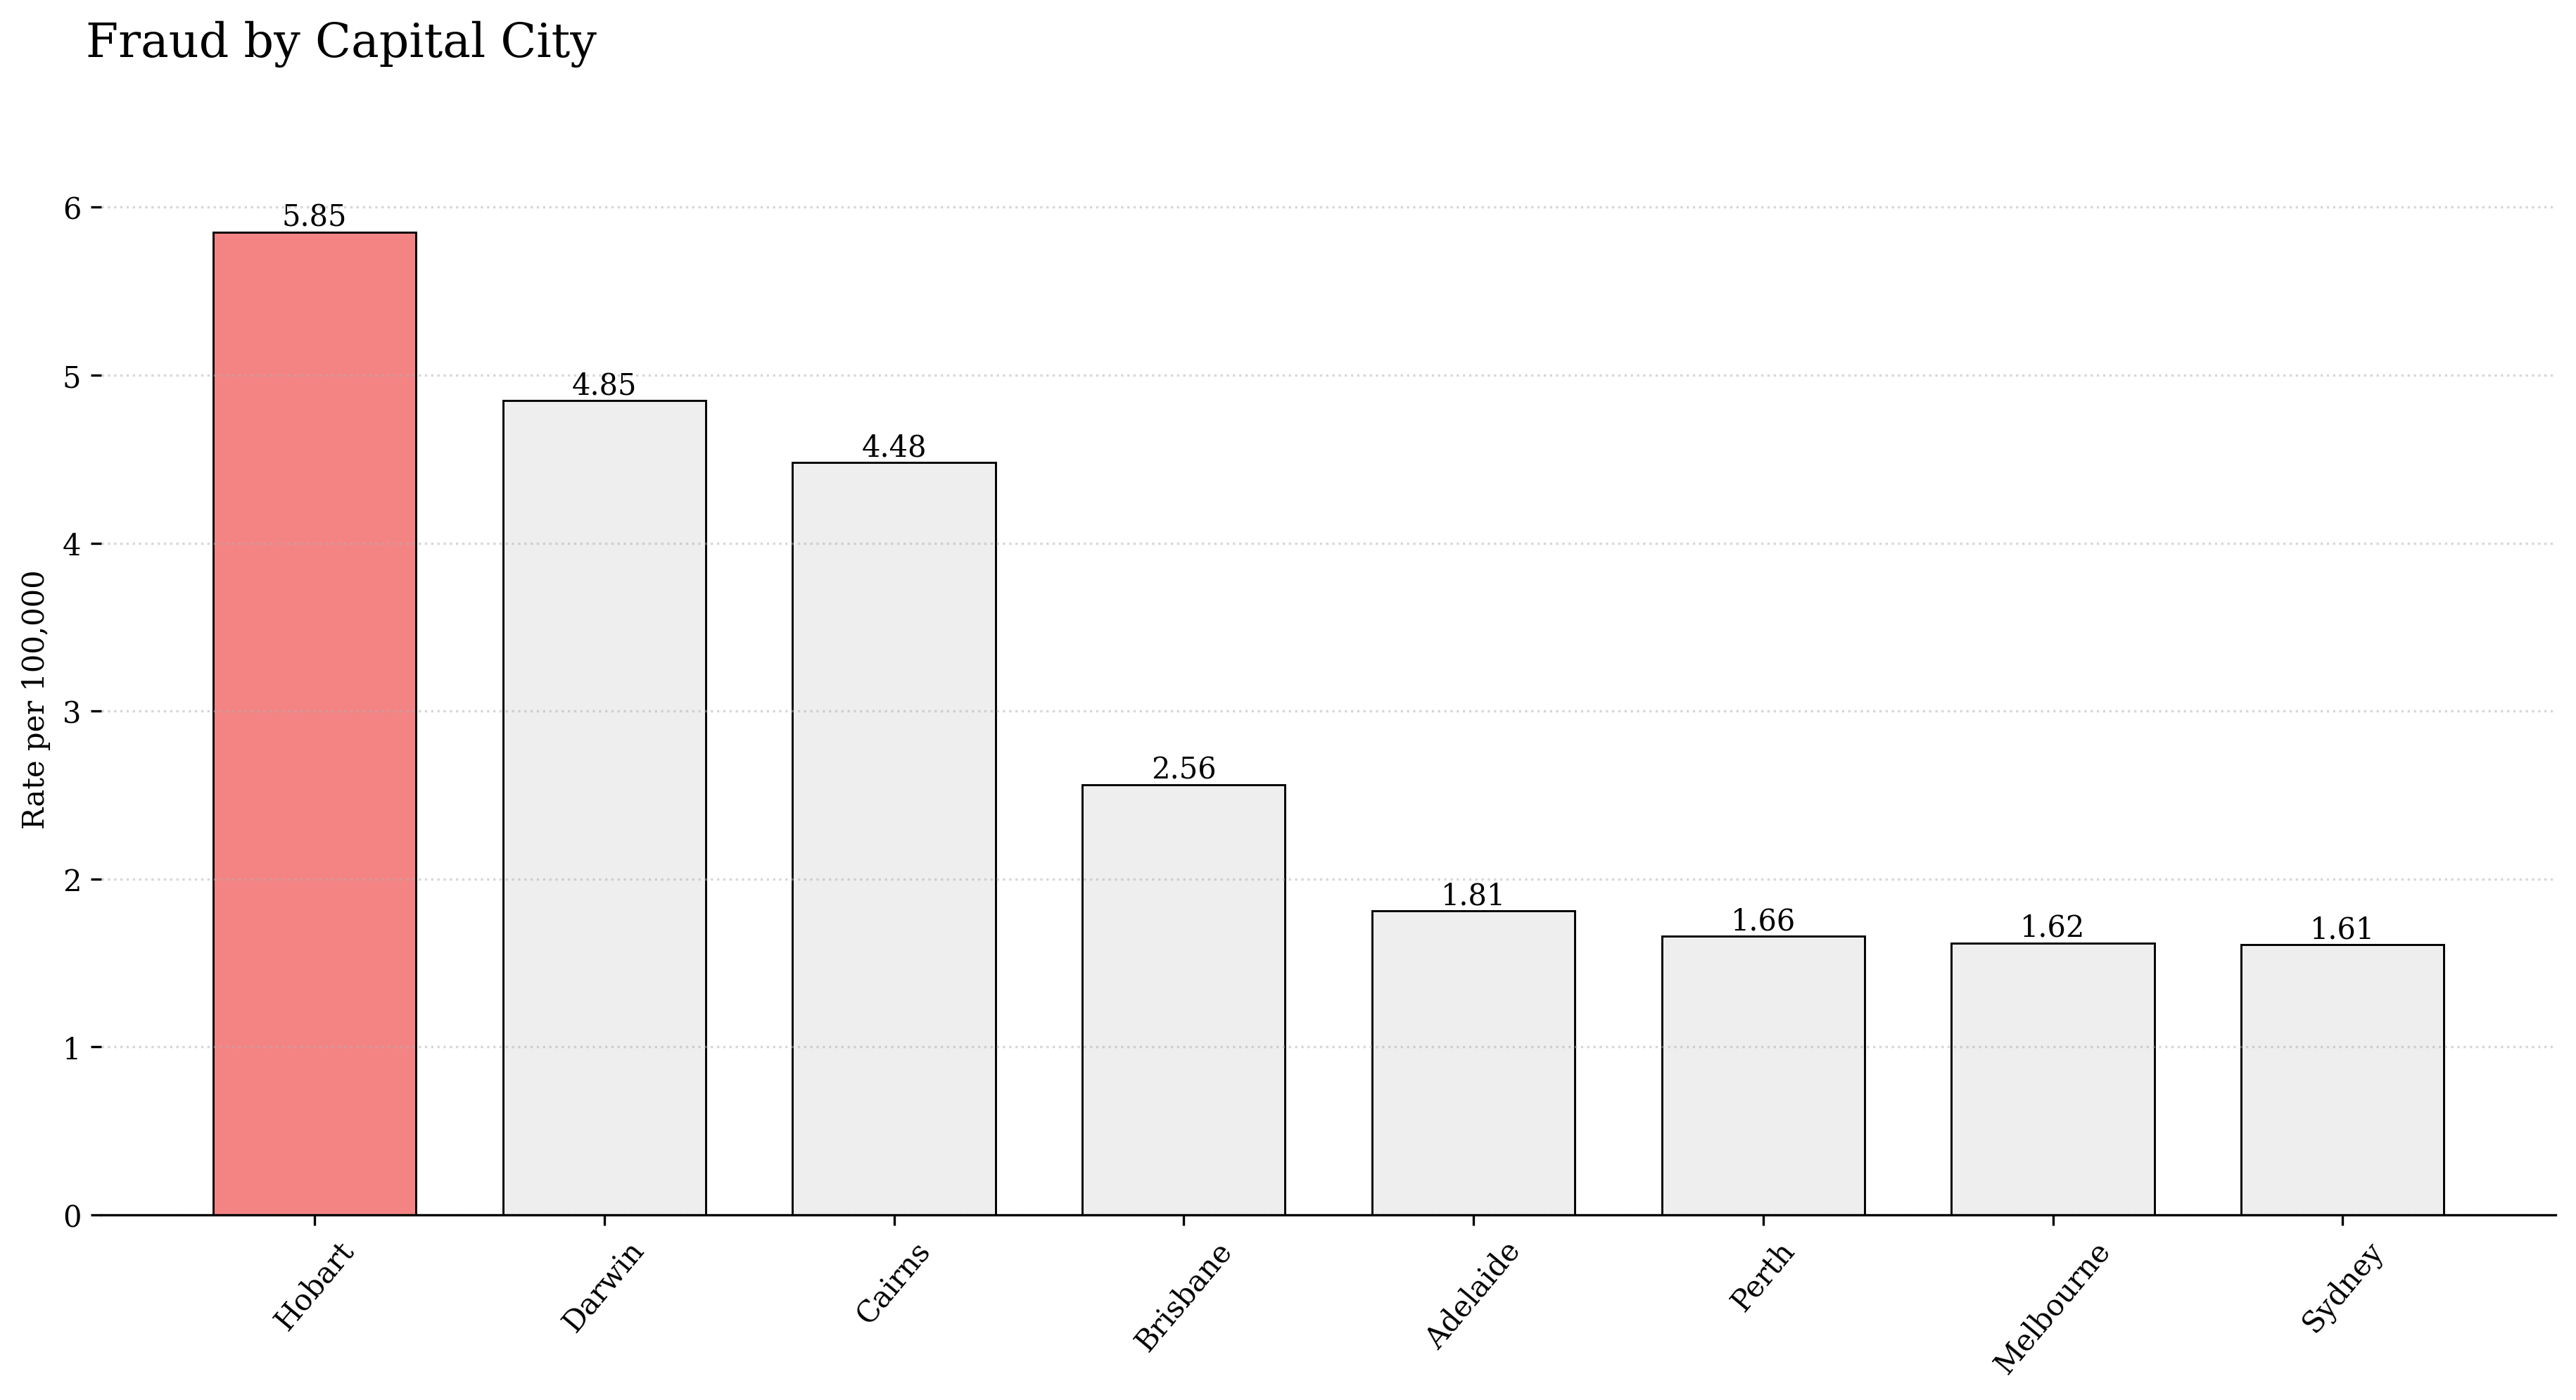

In [248]:
fraud_data = extract_data(case_incident_data, 'Fraud', city_population)
fraud_data = dict(reversed(sorted(fraud_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(fraud_data.keys(), fraud_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in fraud_data.keys():
    ax.annotate(f"{fraud_data[i]}", xy=(i, fraud_data[i] + 0.09),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Fraud by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-9"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>9. Identity Crime by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>The viusalisation provided shows the rate of "Identity Crime" per 100,000 population for each capital city in Australia. "Identity Crime" refers to the illegal use of another person's personal information, such as their name, date of birth, or credit card details, for financial gain or to commit other crimes.</p>

<p>From the insights gathered, Perth has the highest rate of "Identity Crime" at 0.43 per 100,000 population. Sydney has the second highest rate at 0.33 per 100,000 population. On the other hand, Hobart, Darwin, and Cairns have the lowest rates of "Identity Crime" at 0 per 100,000 population respectively.</p>

<p>In recent years, there have been notable cases of identity crime in Australia. In 2019, <a href="https://www.9news.com.au/national/arrest-over-11-million-nsw-cyber-crime/942a3387-1fbd-413d-8cc6-cd4fd9c4f01b">a group of individuals were charged with identity fraud and money laundering in Sydney</a>, where they had used stolen identities to open bank accounts and apply for credit cards. In 2018, <a href="https://www.9news.com.au/national/identity-theft-police-crackdown/3c9adf45-1184-4926-aee1-e0267c1d45be">a large-scale identity crime ring was dismantled in Melbourne</a>. It is worth noting that these cases are not specific to these cities, but rather indicate a nationwide problem with identity crime.</p>
</div>

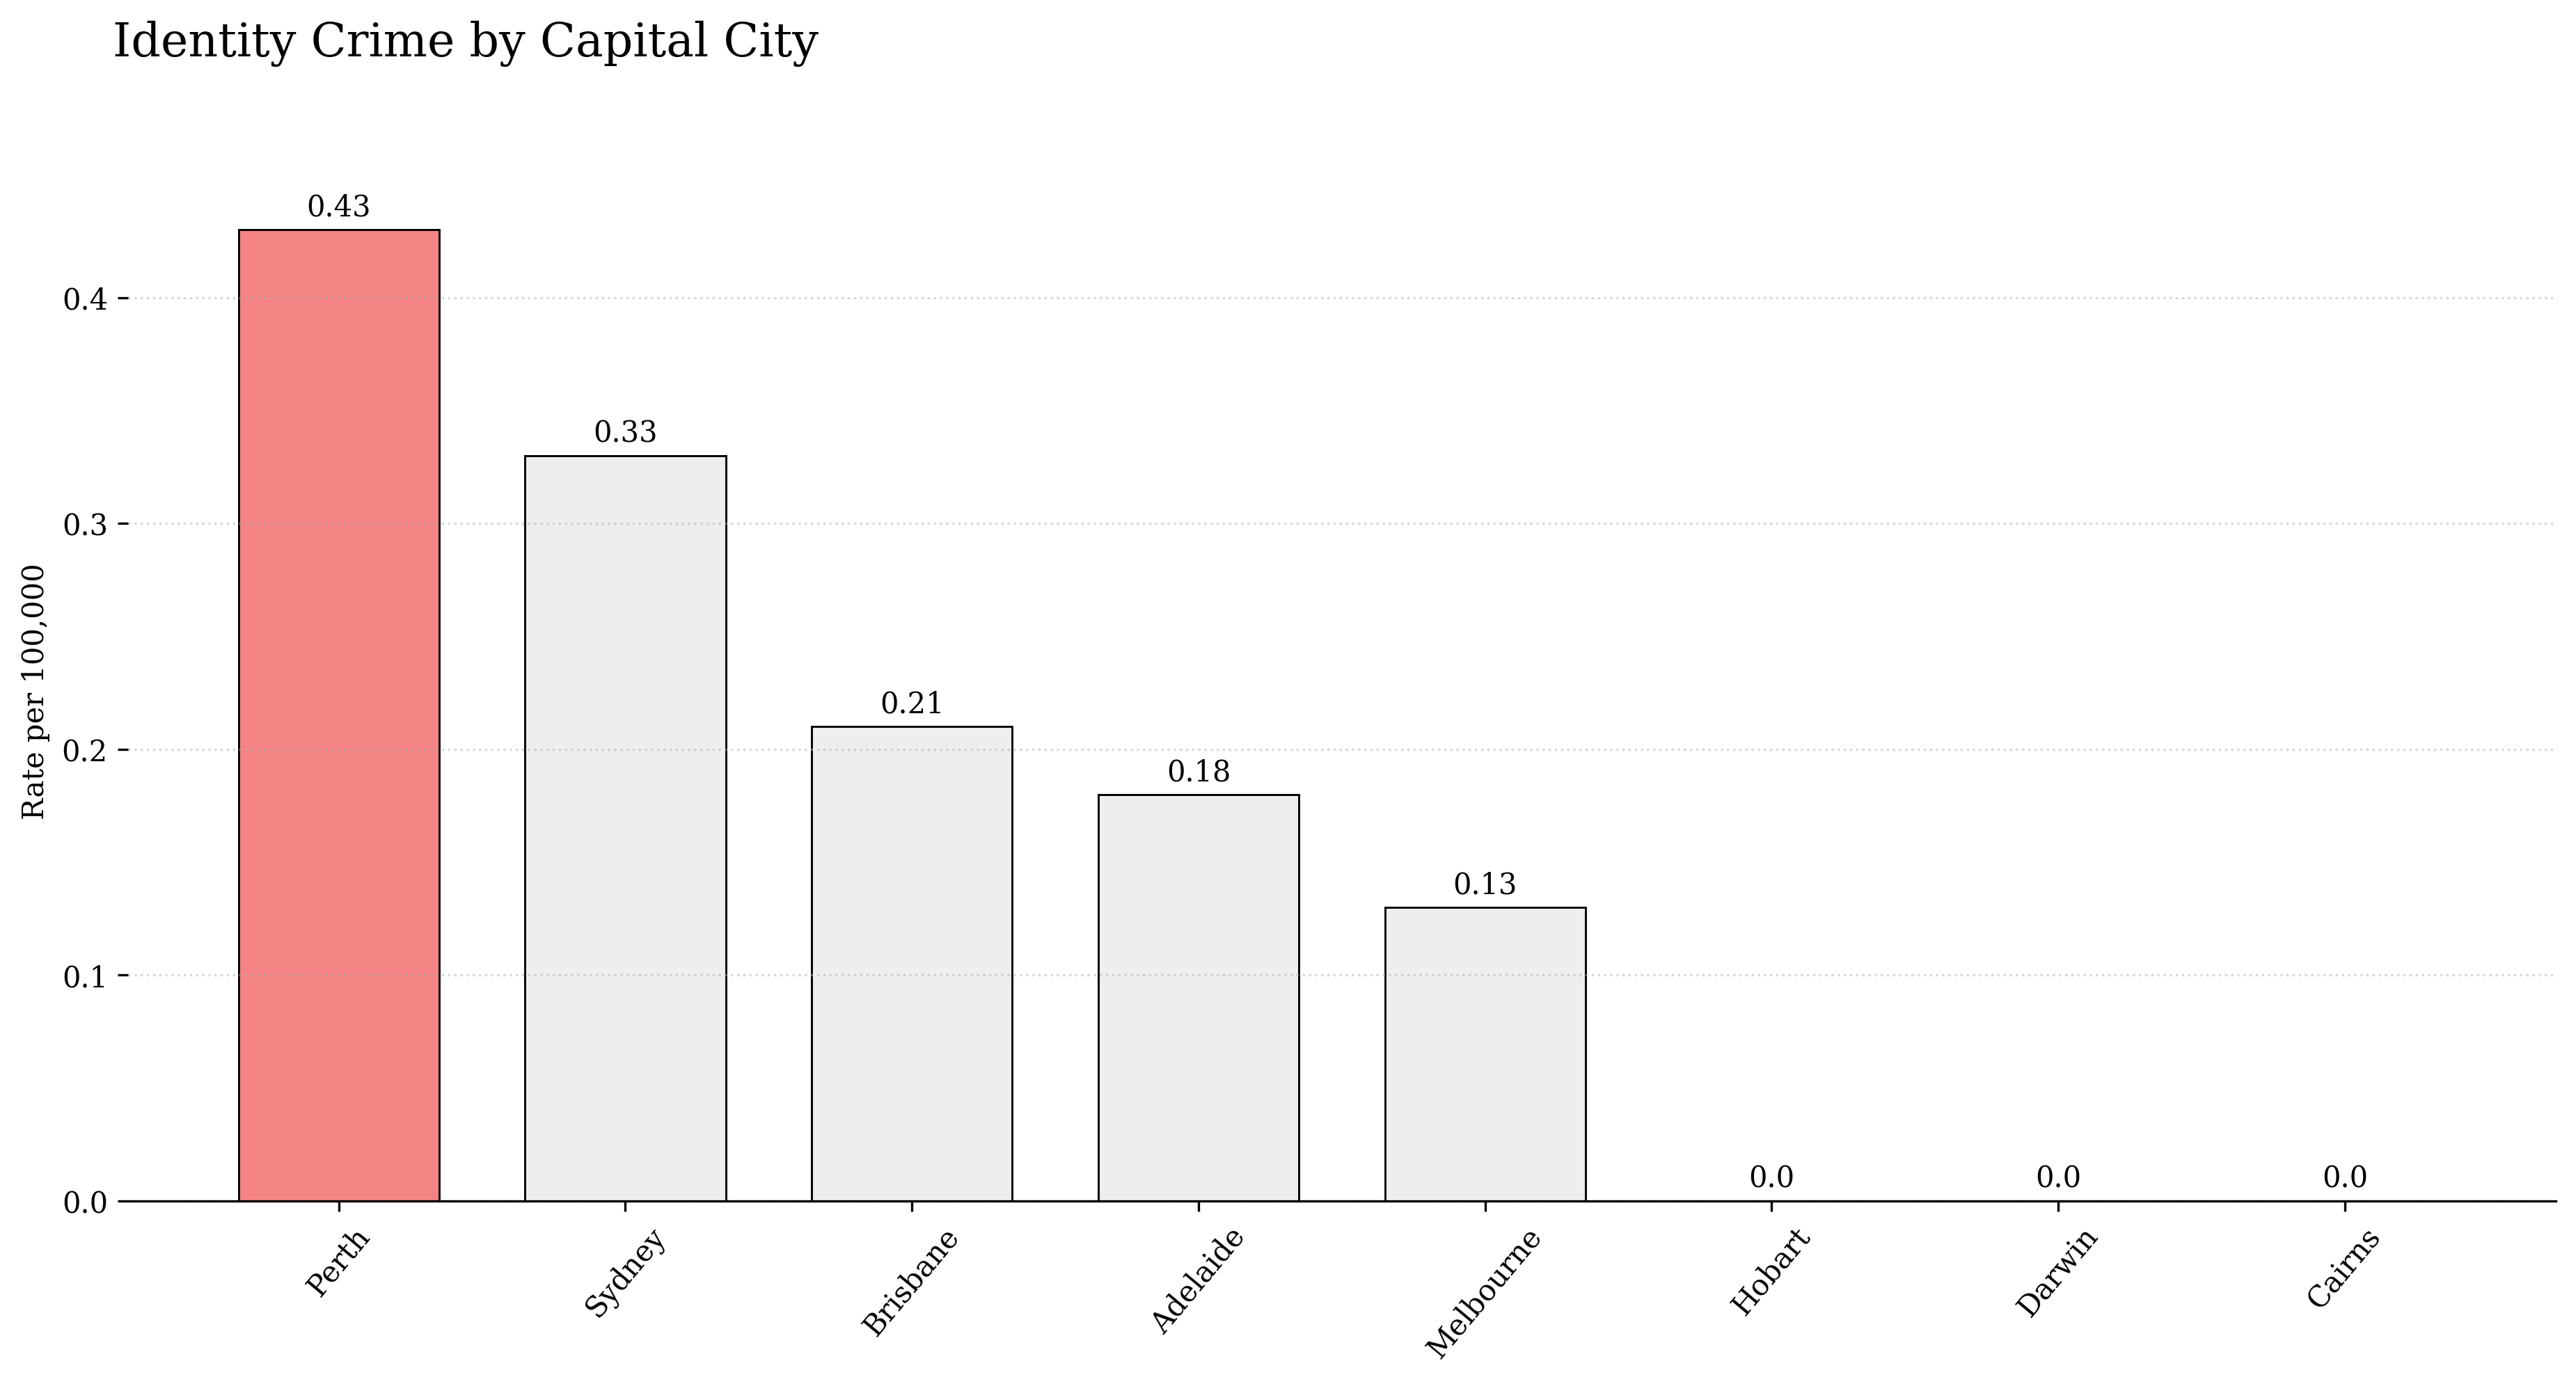

In [249]:
identity_crime_data = extract_data(case_incident_data, 'Identity Crime', city_population)
identity_crime_data = dict(reversed(sorted(identity_crime_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(identity_crime_data.keys(), identity_crime_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in identity_crime_data.keys():
    ax.annotate(f"{identity_crime_data[i]}", xy=(i, identity_crime_data[i] + 0.01),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Identity Crime by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-10"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>10. Emerging Crime by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>The visualisation below shows the rate of "Emerging Crime" per 100,000 population for each capital city in Australia. "Emerging Crime" refers to new or evolving forms of criminal activity that are not well understood or recognised by law enforcement and the criminal justice system.</p>

<p>Cairns has the highest rate of "Emerging Crime" at 0.75 per 100,000 population. It is worth noting that Cairns is geographically located beside Darwin, which has been found to have high rates in various types of crime, including "Drugs − Imported", "People Smuggling", "Information And Communications Technology". This proximity may contribute to the higher rate of "Emerging Crime" in Cairns compared to other capital cities. Brisbane has the second highest rate at 0.21 per 100,000 population. On the other hand, Hobart and Darwin have the lowest rates of "Emerging Crime" at 0 per 100,000 population. The fact that Darwin has been dominant in high rates of crime in various types of crime and Cairns being beside Darwin may have some relation in the emerging crime in Cairns.</p>
</div>

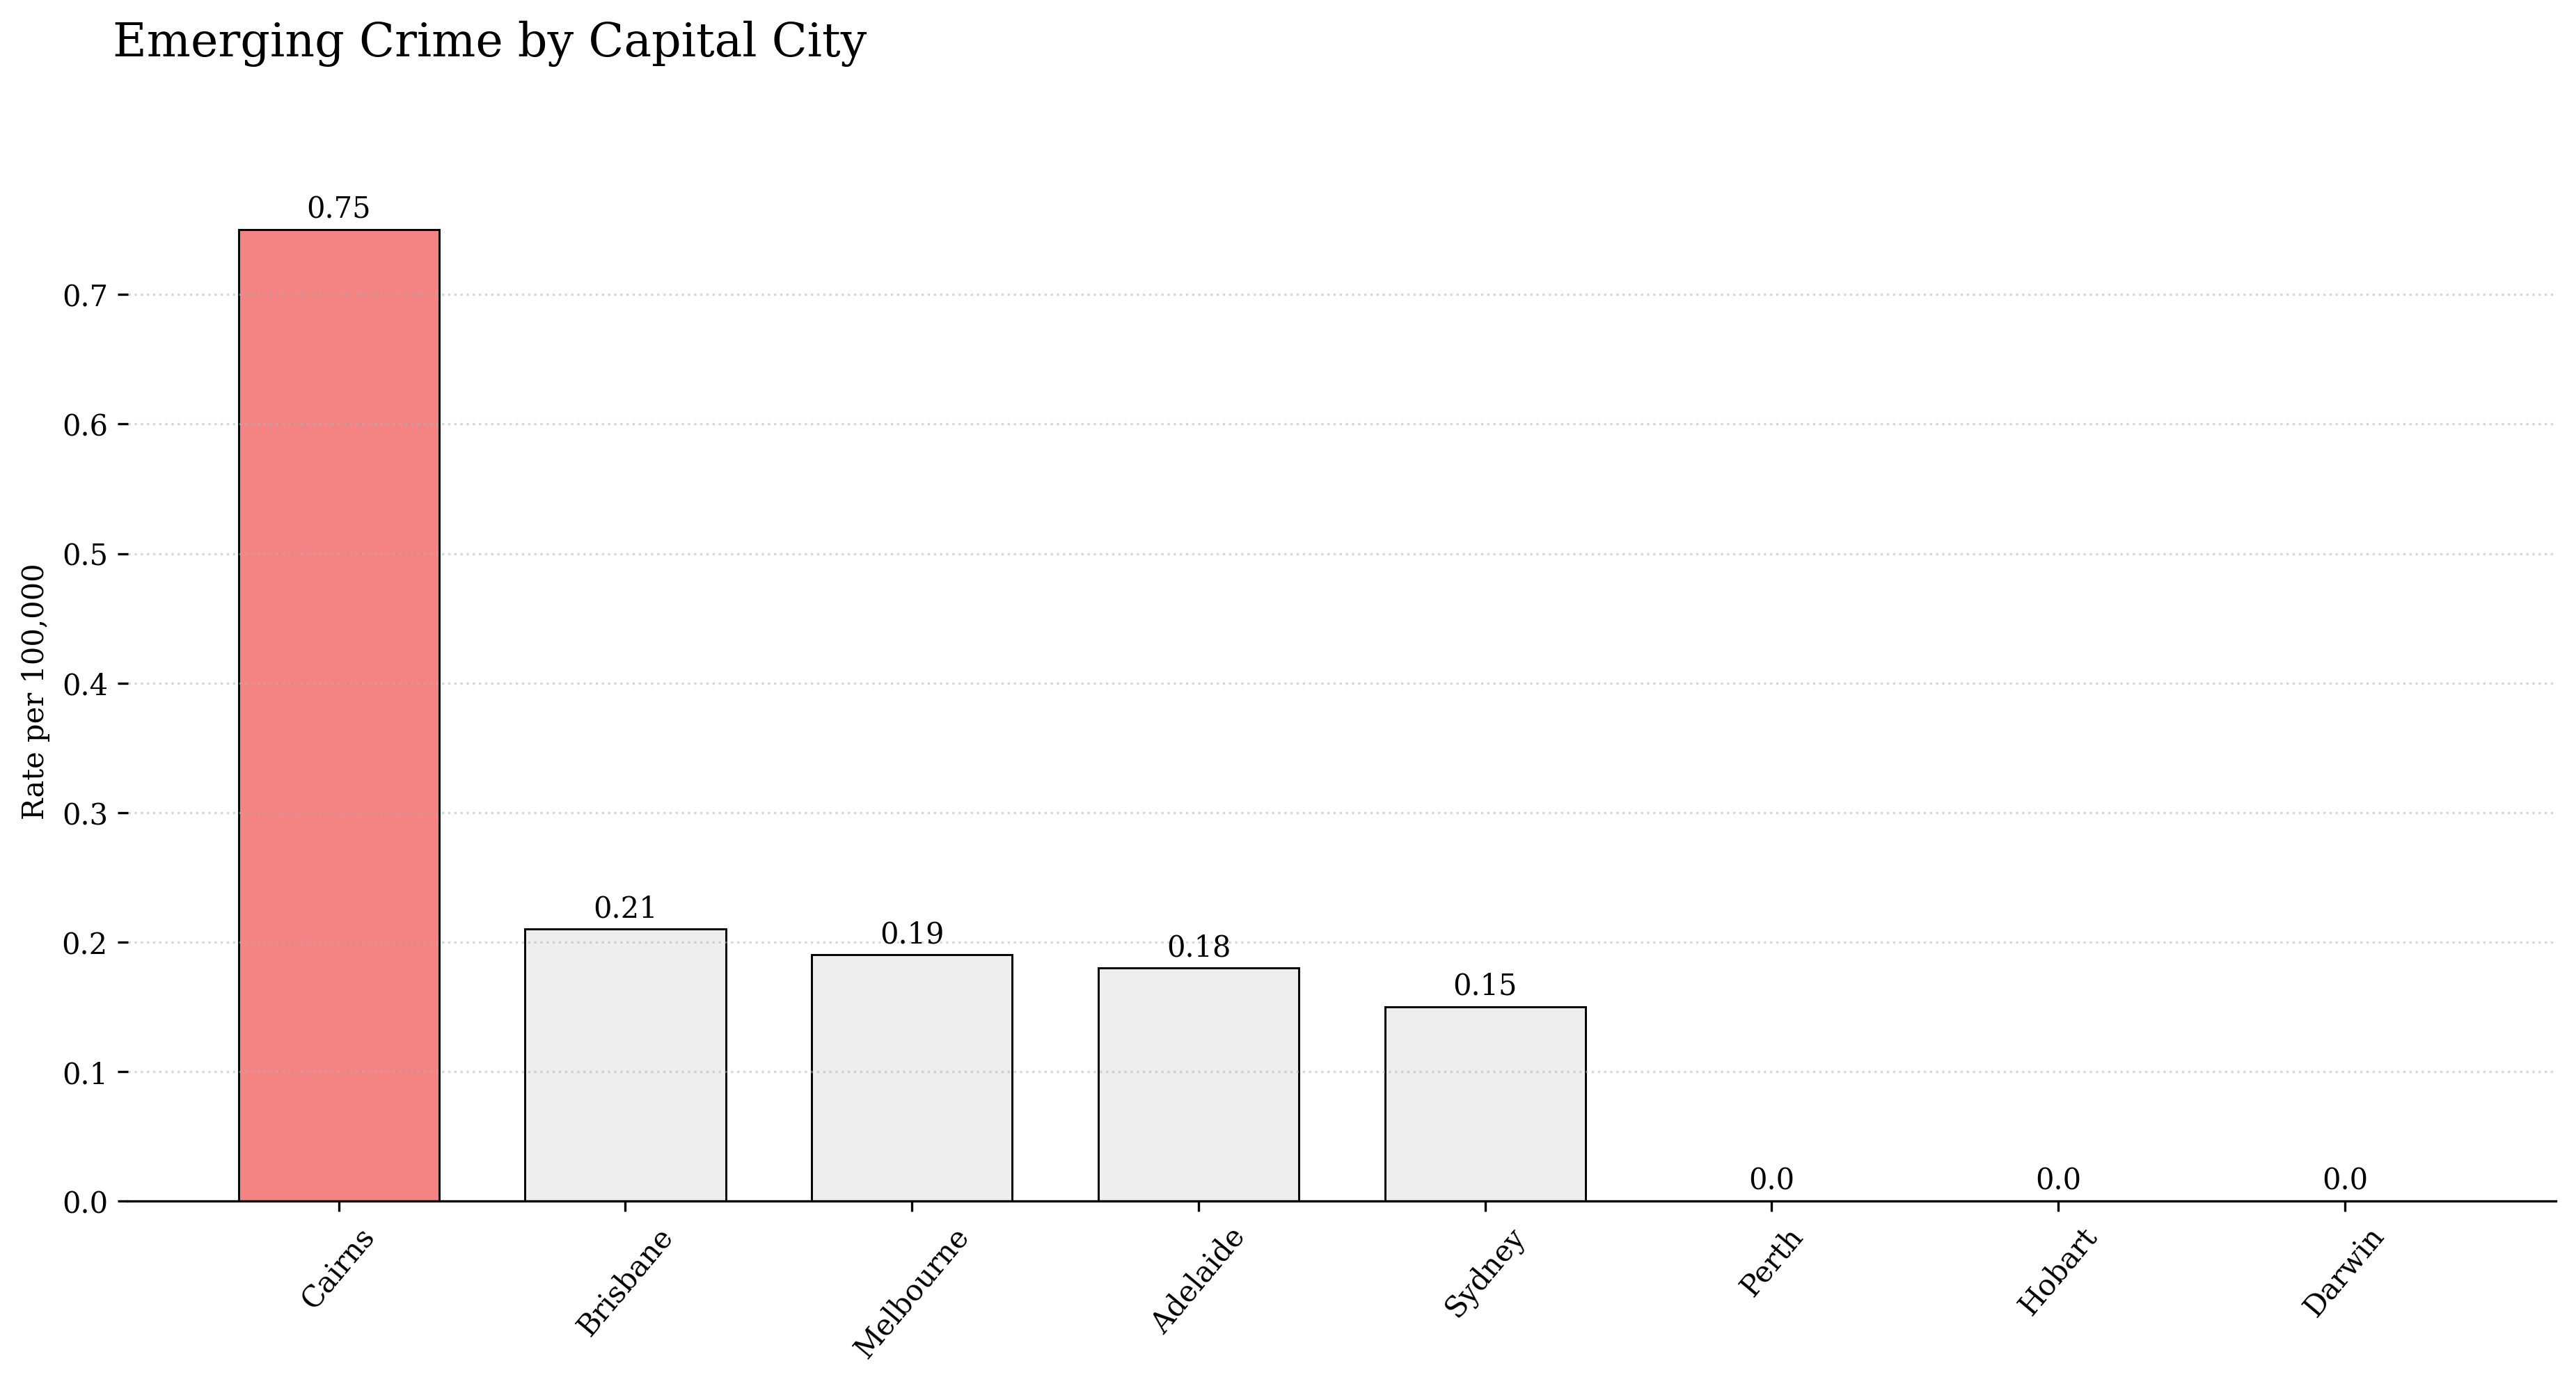

In [250]:
emerge_crime_data = extract_data(case_incident_data, 'Emerging Crime', city_population)
emerge_crime_data = dict(reversed(sorted(emerge_crime_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(emerge_crime_data.keys(), emerge_crime_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in emerge_crime_data.keys():
    ax.annotate(f"{emerge_crime_data[i]}", xy=(i, emerge_crime_data[i] + 0.016),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Emerging Crime by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-11"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>11. Money Laundering by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>The visualisation below represents the rate of "Money Laundering" per 100,000 population in the capital cities of Australia. "Money Laundering" refers to the process of making illegally-gained proceeds (i.e. "dirty money") appear legal (i.e. "clean").</p>

<p>Adelaide has the highest rate of "Money Laundering" at 6.34 per 100,000 population. Cairns has the second highest rate at 5.98 per 100,000 population, and Perth has the third highest rate at 3.87 per 100,000 population. On the other hand, Darwin has the lowest rate of "Money Laundering" at 0 per 100,000 population. It is important to note that the rate of money laundering may be influenced by various factors such as the city's economy, the presence of financial institutions, and the effectiveness of law enforcement in detecting and preventing money laundering activities.</p>
</div>

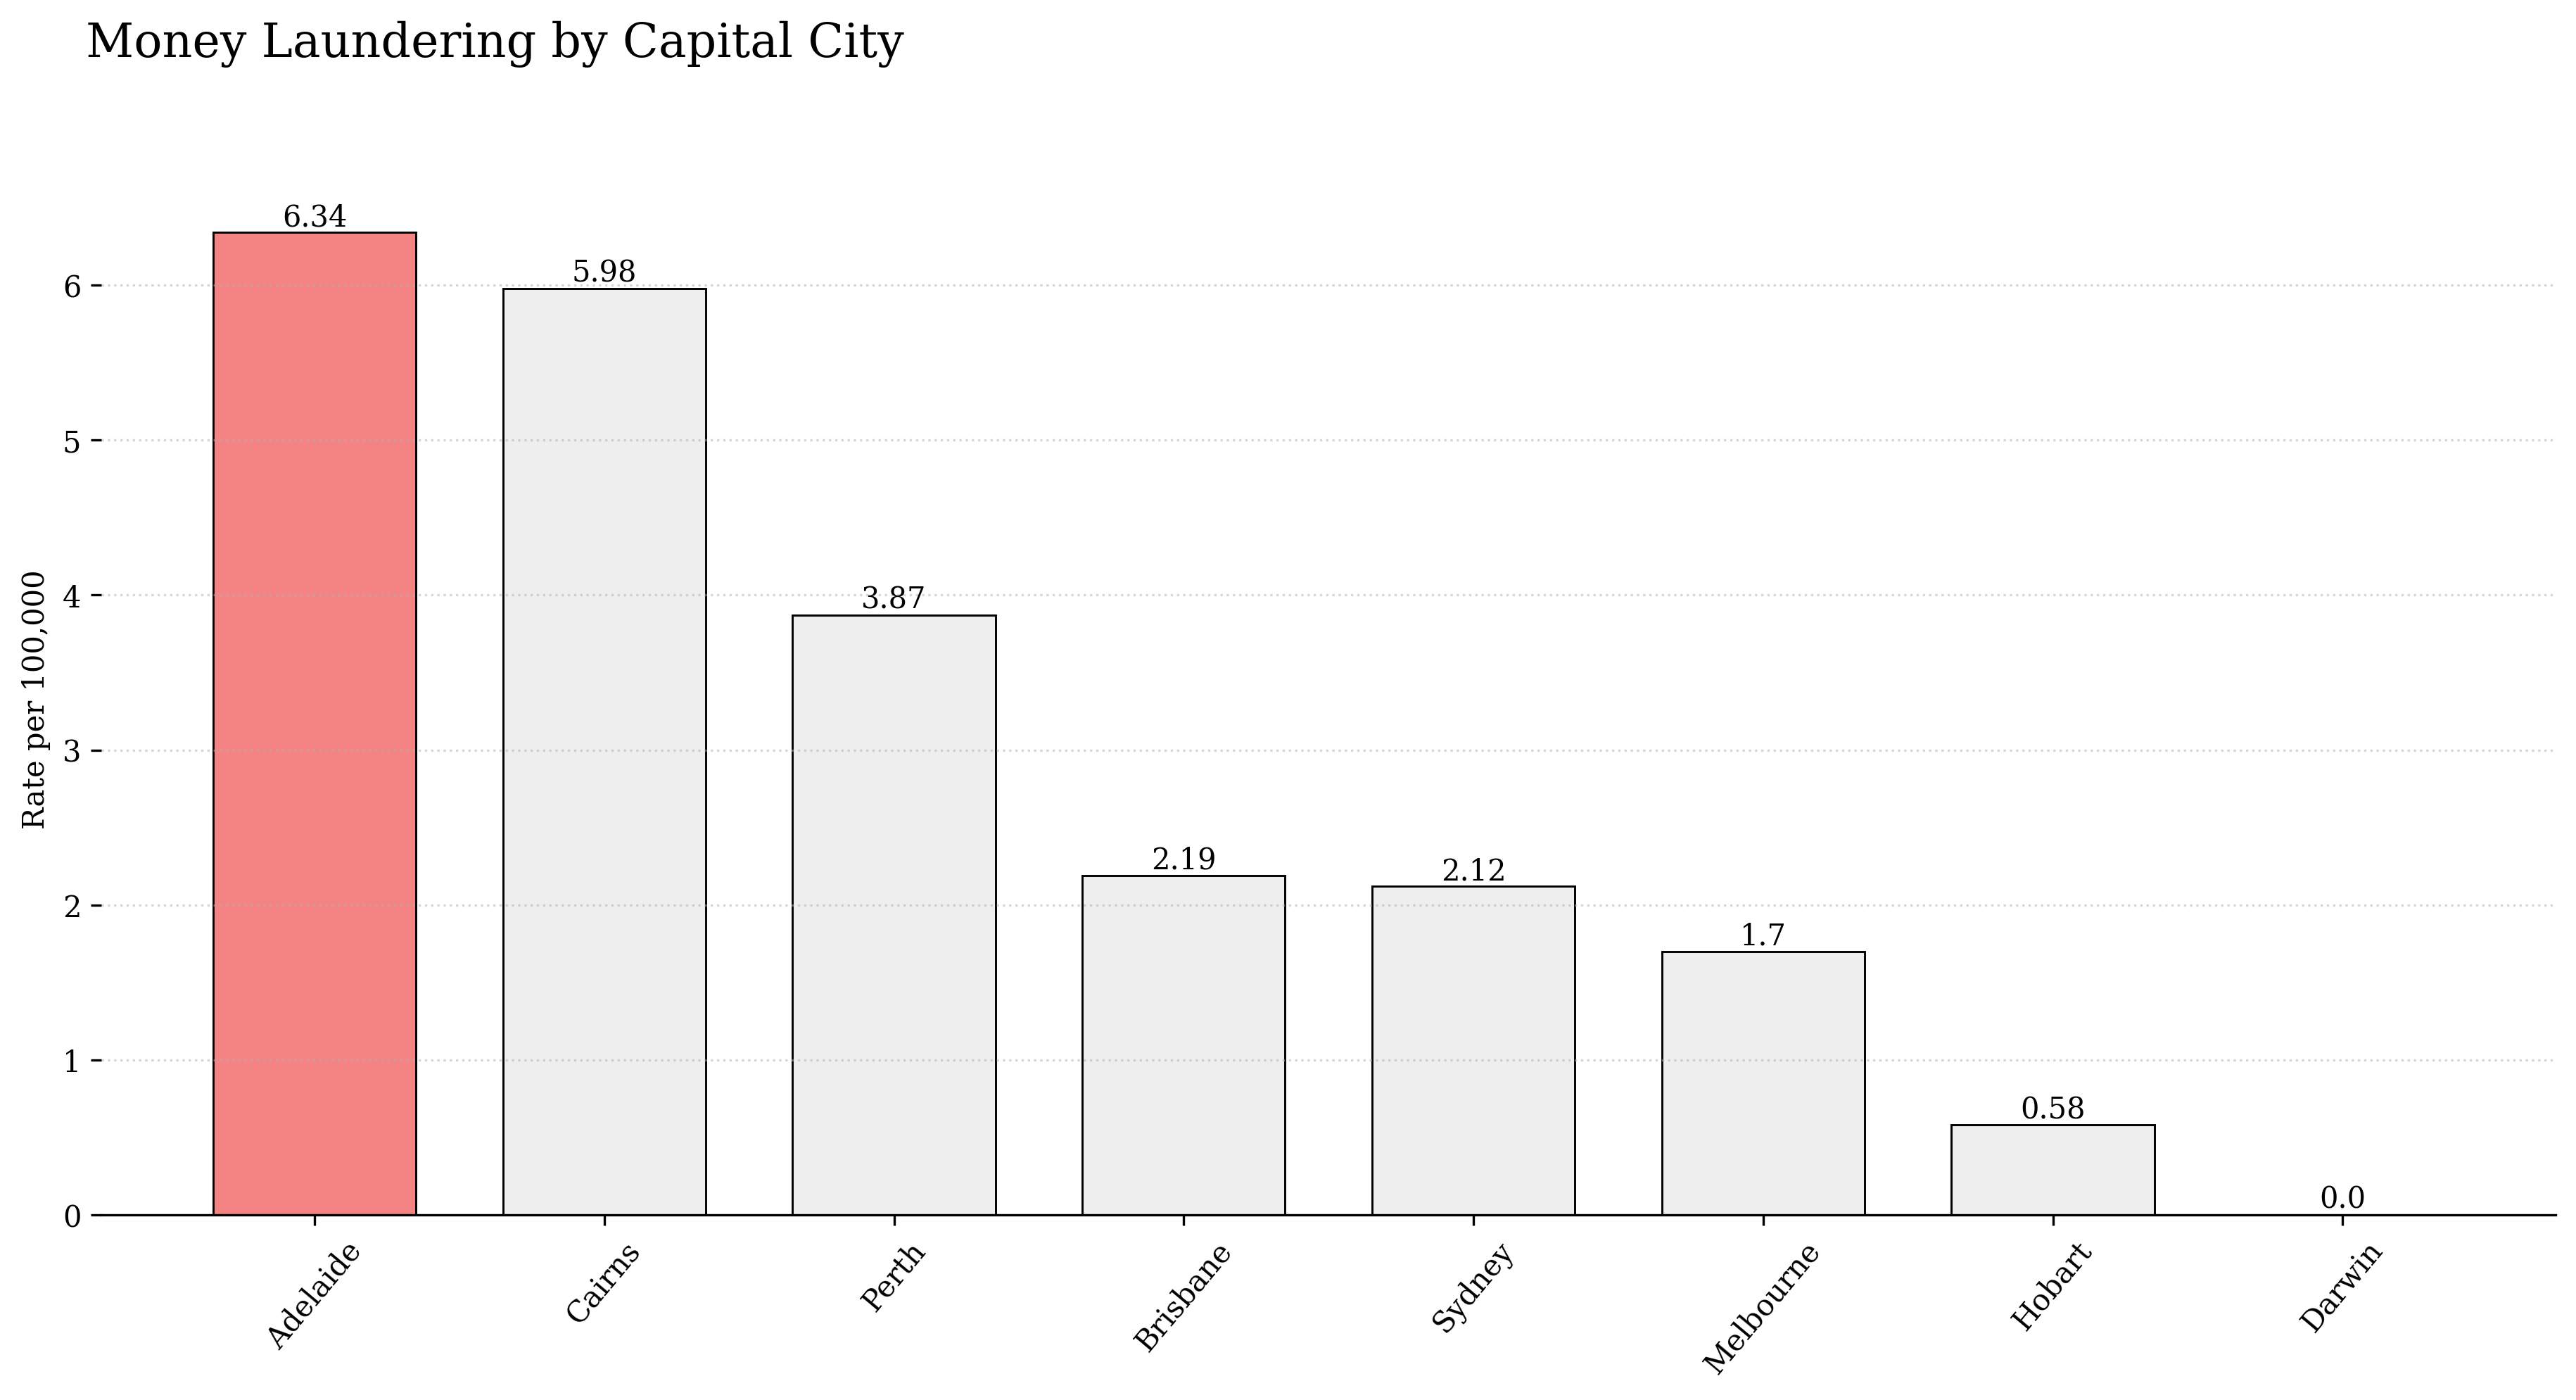

In [251]:
mon_laun_data = extract_data(case_incident_data, 'Money Laundering', city_population)
mon_laun_data = dict(reversed(sorted(mon_laun_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(mon_laun_data.keys(), mon_laun_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in mon_laun_data.keys():
    ax.annotate(f"{mon_laun_data[i]}", xy=(i, mon_laun_data[i] + 0.1),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Money Laundering by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-12"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>12. Child Sex Offences − Online Child Sex Exploitation by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>The visualisation below shows the rate of "Child Sex Offences − Online Child Sex Exploitation" per 100,000 population for each capital city in Australia. This type of crime refers to the exploitation of children through the use of technology, such as the internet or mobile devices.</p>

<p>From the data provided, Hobart has the highest rate of "Child Sex Offences − Online Child Sex Exploitation" at 4.68 per 100,000 population. This is significantly higher than the other capital cities, with Brisbane having the second highest rate at 2.19 per 100,000 population. It is worth noting that the rates in Darwin and Cairns are 0 per 100,000 population.</p>
    
<p>It is unclear why Hobart has such a high rate of this type of crime compared to the other capital cities. It could be due to a number of factors such as a higher incidence of this type of crime, or a more effective reporting and recording of such crimes. It would be useful to have more context on why this might be the case. Historically, Hobart has been known for its high rate of child sexual abuse, with the Royal Commission into Institutional Responses to Child Sexual Abuse revealing in 2017 that Tasmania had the highest number of child sexual abuse cases per capita in Australia.</p>

<p><a href="https://www.royalcommission.gov.au/child-abuse#:~:text=The%20Royal%20Commission%20into%20Institutional,that%20had%20been%20emerging%20in">The Royal Commission into Institutional Responses to Child Sexual Abuse</a> was an Australian royal commission established in 2013 to investigate institutional responses to allegations and incidents of child sexual abuse in Australia. The commission held public hearings between 2013 and 2017, and released its final report in December 2017. The report revealed that Tasmania had the highest number of child sexual abuse cases per capita in Australia, and made more than 400 recommendations for reforms across various sectors and institutions, including the Catholic Church, the Anglican Church, the Salvation Army, and government agencies.</p>
</div>

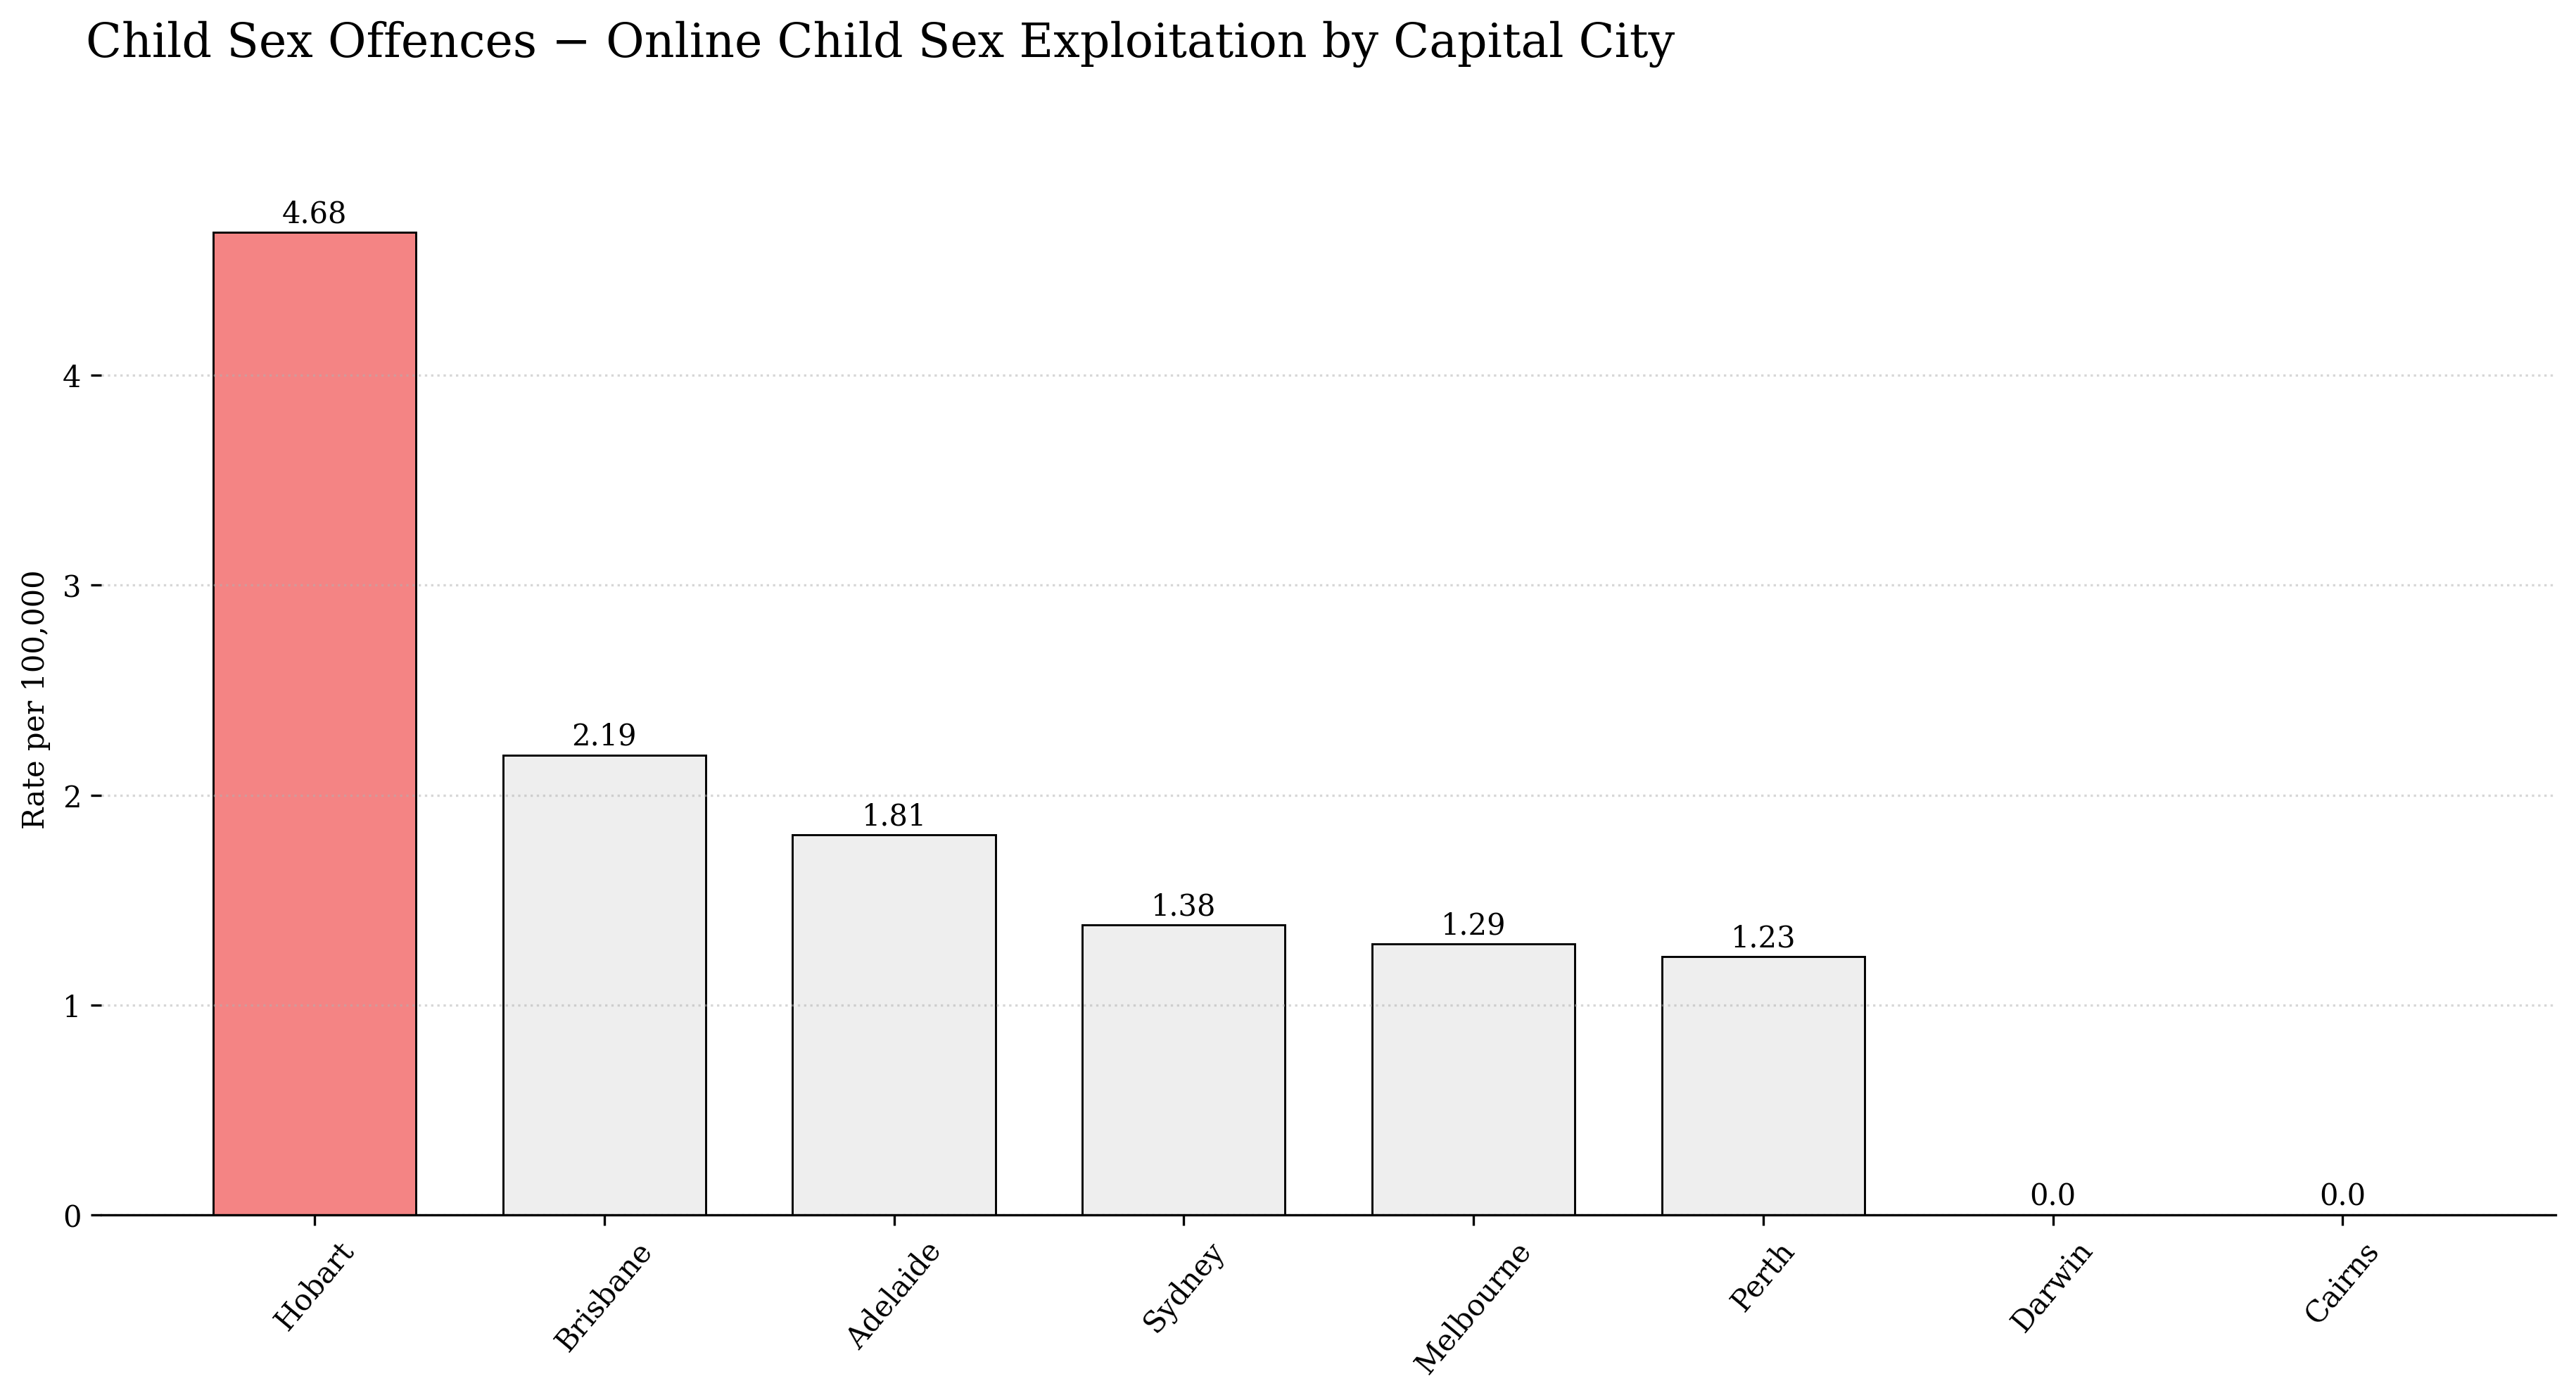

In [252]:
cs_data = extract_data(case_incident_data, 'Child Sex Offences − Online Child Sex Exploitation', city_population)
cs_data = dict(reversed(sorted(cs_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(cs_data.keys(), cs_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in cs_data.keys():
    ax.annotate(f"{cs_data[i]}", xy=(i, cs_data[i] + 0.09),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Child Sex Offences − Online Child Sex Exploitation by Capital City",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-13"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>13. Transnational − Child Sex Tourism by Capital City</b></h1>
</div>

<div style="font-family: Serif">

<p>The visualisation below shows the rate of "Transnational − Child Sex Tourism" per 100,000 population for each capital city in Australia. "Transnational − Child Sex Tourism" refers to the sexual exploitation of children by individuals who travel from one country to another, typically to engage in sexual activity with minors.</p>

<p>Darwin has the highest rate of "Transnational − Child Sex Tourism" at 0.97 per 100,000 population. This may be due to the city's proximity to Southeast Asia, which is a known region for child sex tourism. Perth has the second highest rate at 0.12 per 100,000 population. On the other hand, Hobart, Cairns and Adelaide have the lowest rates of "Transnational − Child Sex Tourism" at 0 per 100,000 population.</p>
</div>

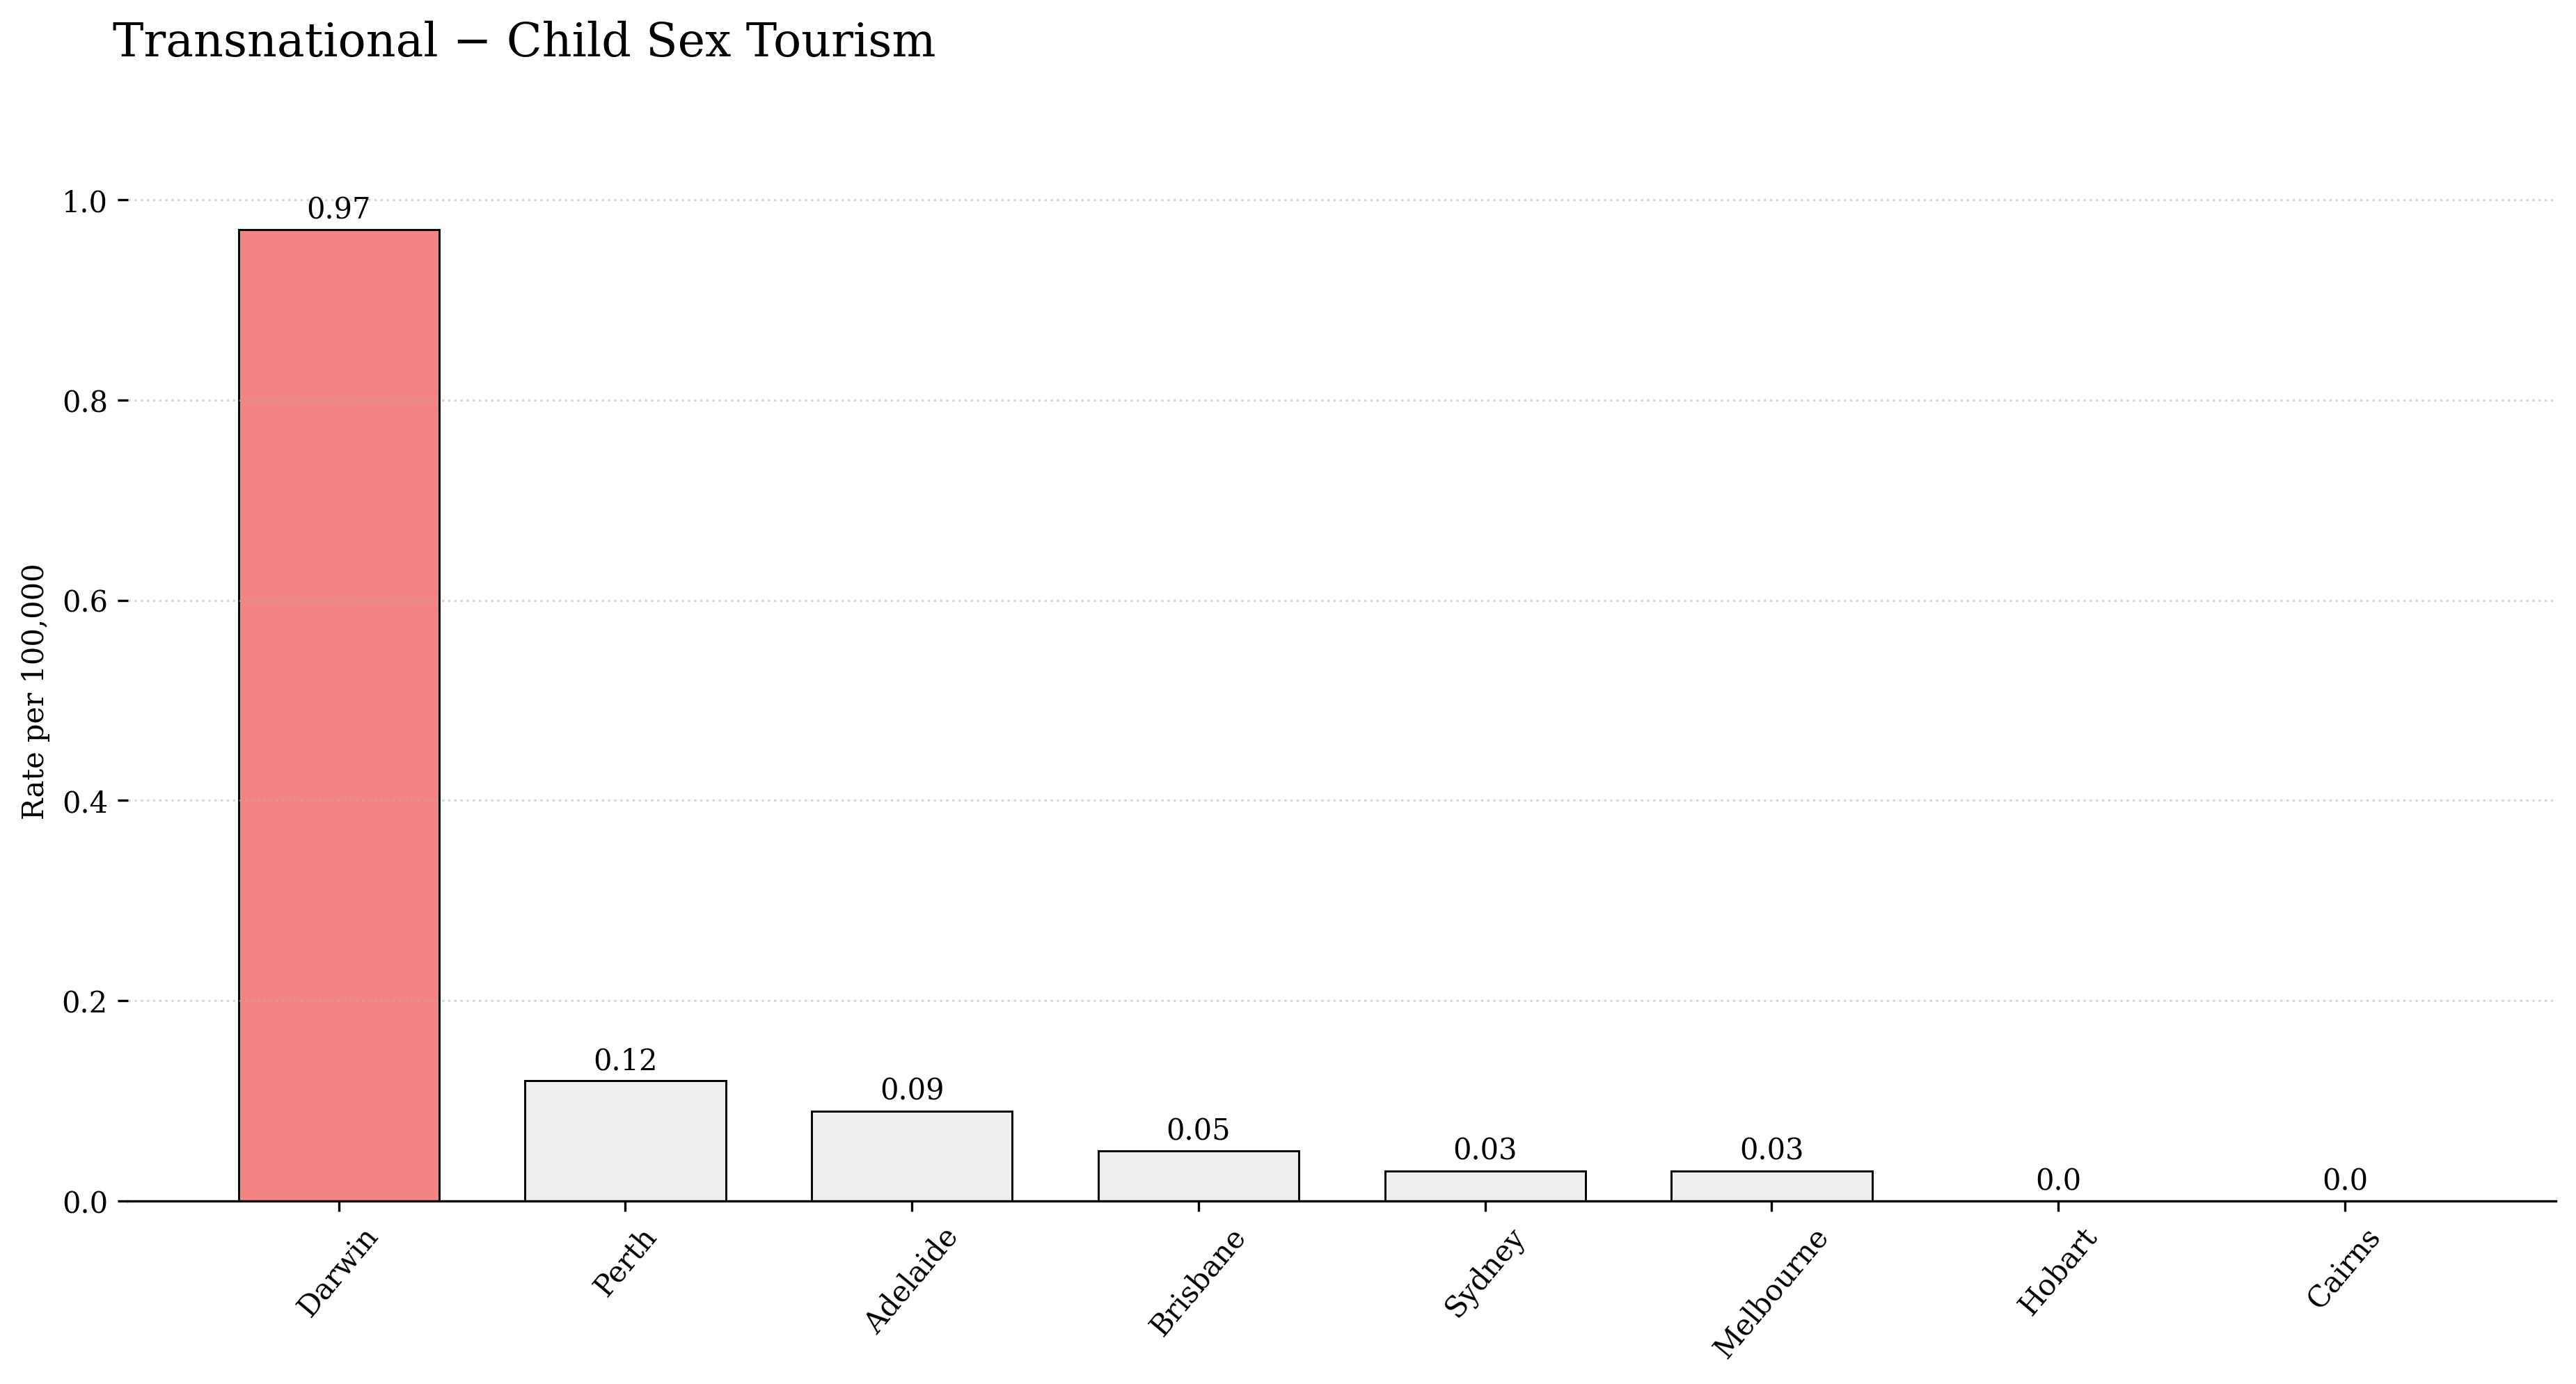

In [253]:
tour_cs_data = extract_data(case_incident_data, 'Transnational − Child Sex Tourism', city_population)
tour_cs_data = dict(reversed(sorted(tour_cs_data.items(), key=lambda x: x[1])))

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

ax.bar(tour_cs_data.keys(), tour_cs_data.values(), width=0.7, 
       edgecolor='black', color=city_colors,
       linewidth=0.7)

for i in tour_cs_data.keys():
    ax.annotate(f"{tour_cs_data[i]}", xy=(i, tour_cs_data[i] + 0.02),va = 'center', ha='center',fontweight='light', color='black')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Rate per 100,000')
plt.xticks(rotation=50)
ax.grid(axis='y', linestyle=':', alpha=0.5)
fig.text(x=0.12, y=0.94, s="Transnational − Child Sex Tourism",fontweight='light', fontsize=16, ha="left", transform=fig.transFigure)
plt.show()

<a id="section-14"></a>
<div class="alert alert-light" role="alert">
<h1 style="font-family: Serif"><b>14. Final Summary</b></h1>
</div>

<div style="font-family: Serif">
    
<p>This short and basic study aimed to examine the rates of various types of crime per 100,000 people in various cities in Australia. The types of crime included in the analysis were "Drugs − Imported", "People Smuggling", "Corruption", "Information And Communications Technology", "Fraud", "Identity Crime", "Emerging Crime", "Money Laundering", "Child Sex Offences − Online Child Sex Exploitation", and "Transnational − Child Sex Tourism".</p>

<p>The results of the analysis revealed that the rates of "Drugs − Imported" crime varied greatly among the cities, with Darwin having the highest rate at 9.71 per 100,000 people and Hobart having the lowest rate at 0.0 per 100,000 people. Similarly, "People Smuggling" and "Corruption" also displayed varying rates among the cities, with Darwin having the highest rate at 1.94 per 100,000 people and 0.75 per 100,000 people respectively, and Adelaide and Brisbane having the lowest rate at 0.09 per 100,000 people and 0.18 per 100,000 people respectively.</p>

<p>The results also revealed that the rates of crime varied greatly among the cities, with certain types of crime being more prevalent in certain cities than others. It is also worth noting that some types of crime had a rate of 0 in certain cities. However, it should be noted that further research is needed to understand the reasons behind these variations and to make a fair comparison.</p>

<p>However, when comparing the rates of the different types of crime, it can be seen that Darwin has the highest rates for "Drugs − Imported" at 9.71, "People Smuggling" at 1.94, "Information And Communications Technology" at 2.91 and "Transnational − Child Sex Tourism" at 0.97 per 100,000 people. This suggests that Darwin may have relatively higher rates of these types of crime compared to the other cities.</p>
    
<p>It is important to note that this data is not enough to make a definitive conclusion on which city is the most dangerous. There may be other factors such as crime prevention, law enforcement, and demographics at play that could affect the crime rates. Therefore, it would be beneficial to have more comprehensive data and context to make a fair comparison.</p>

<p>In conclusion, the data suggests that there are variations in crime rates among different cities in Australia, and certain types of crime are more prevalent in certain cities. However, without more information and context, it is difficult to make definitive conclusions about which city is the most dangerous. Further research is needed to understand the reasons behind these variations and to make fair comparisons.</p>
</div>

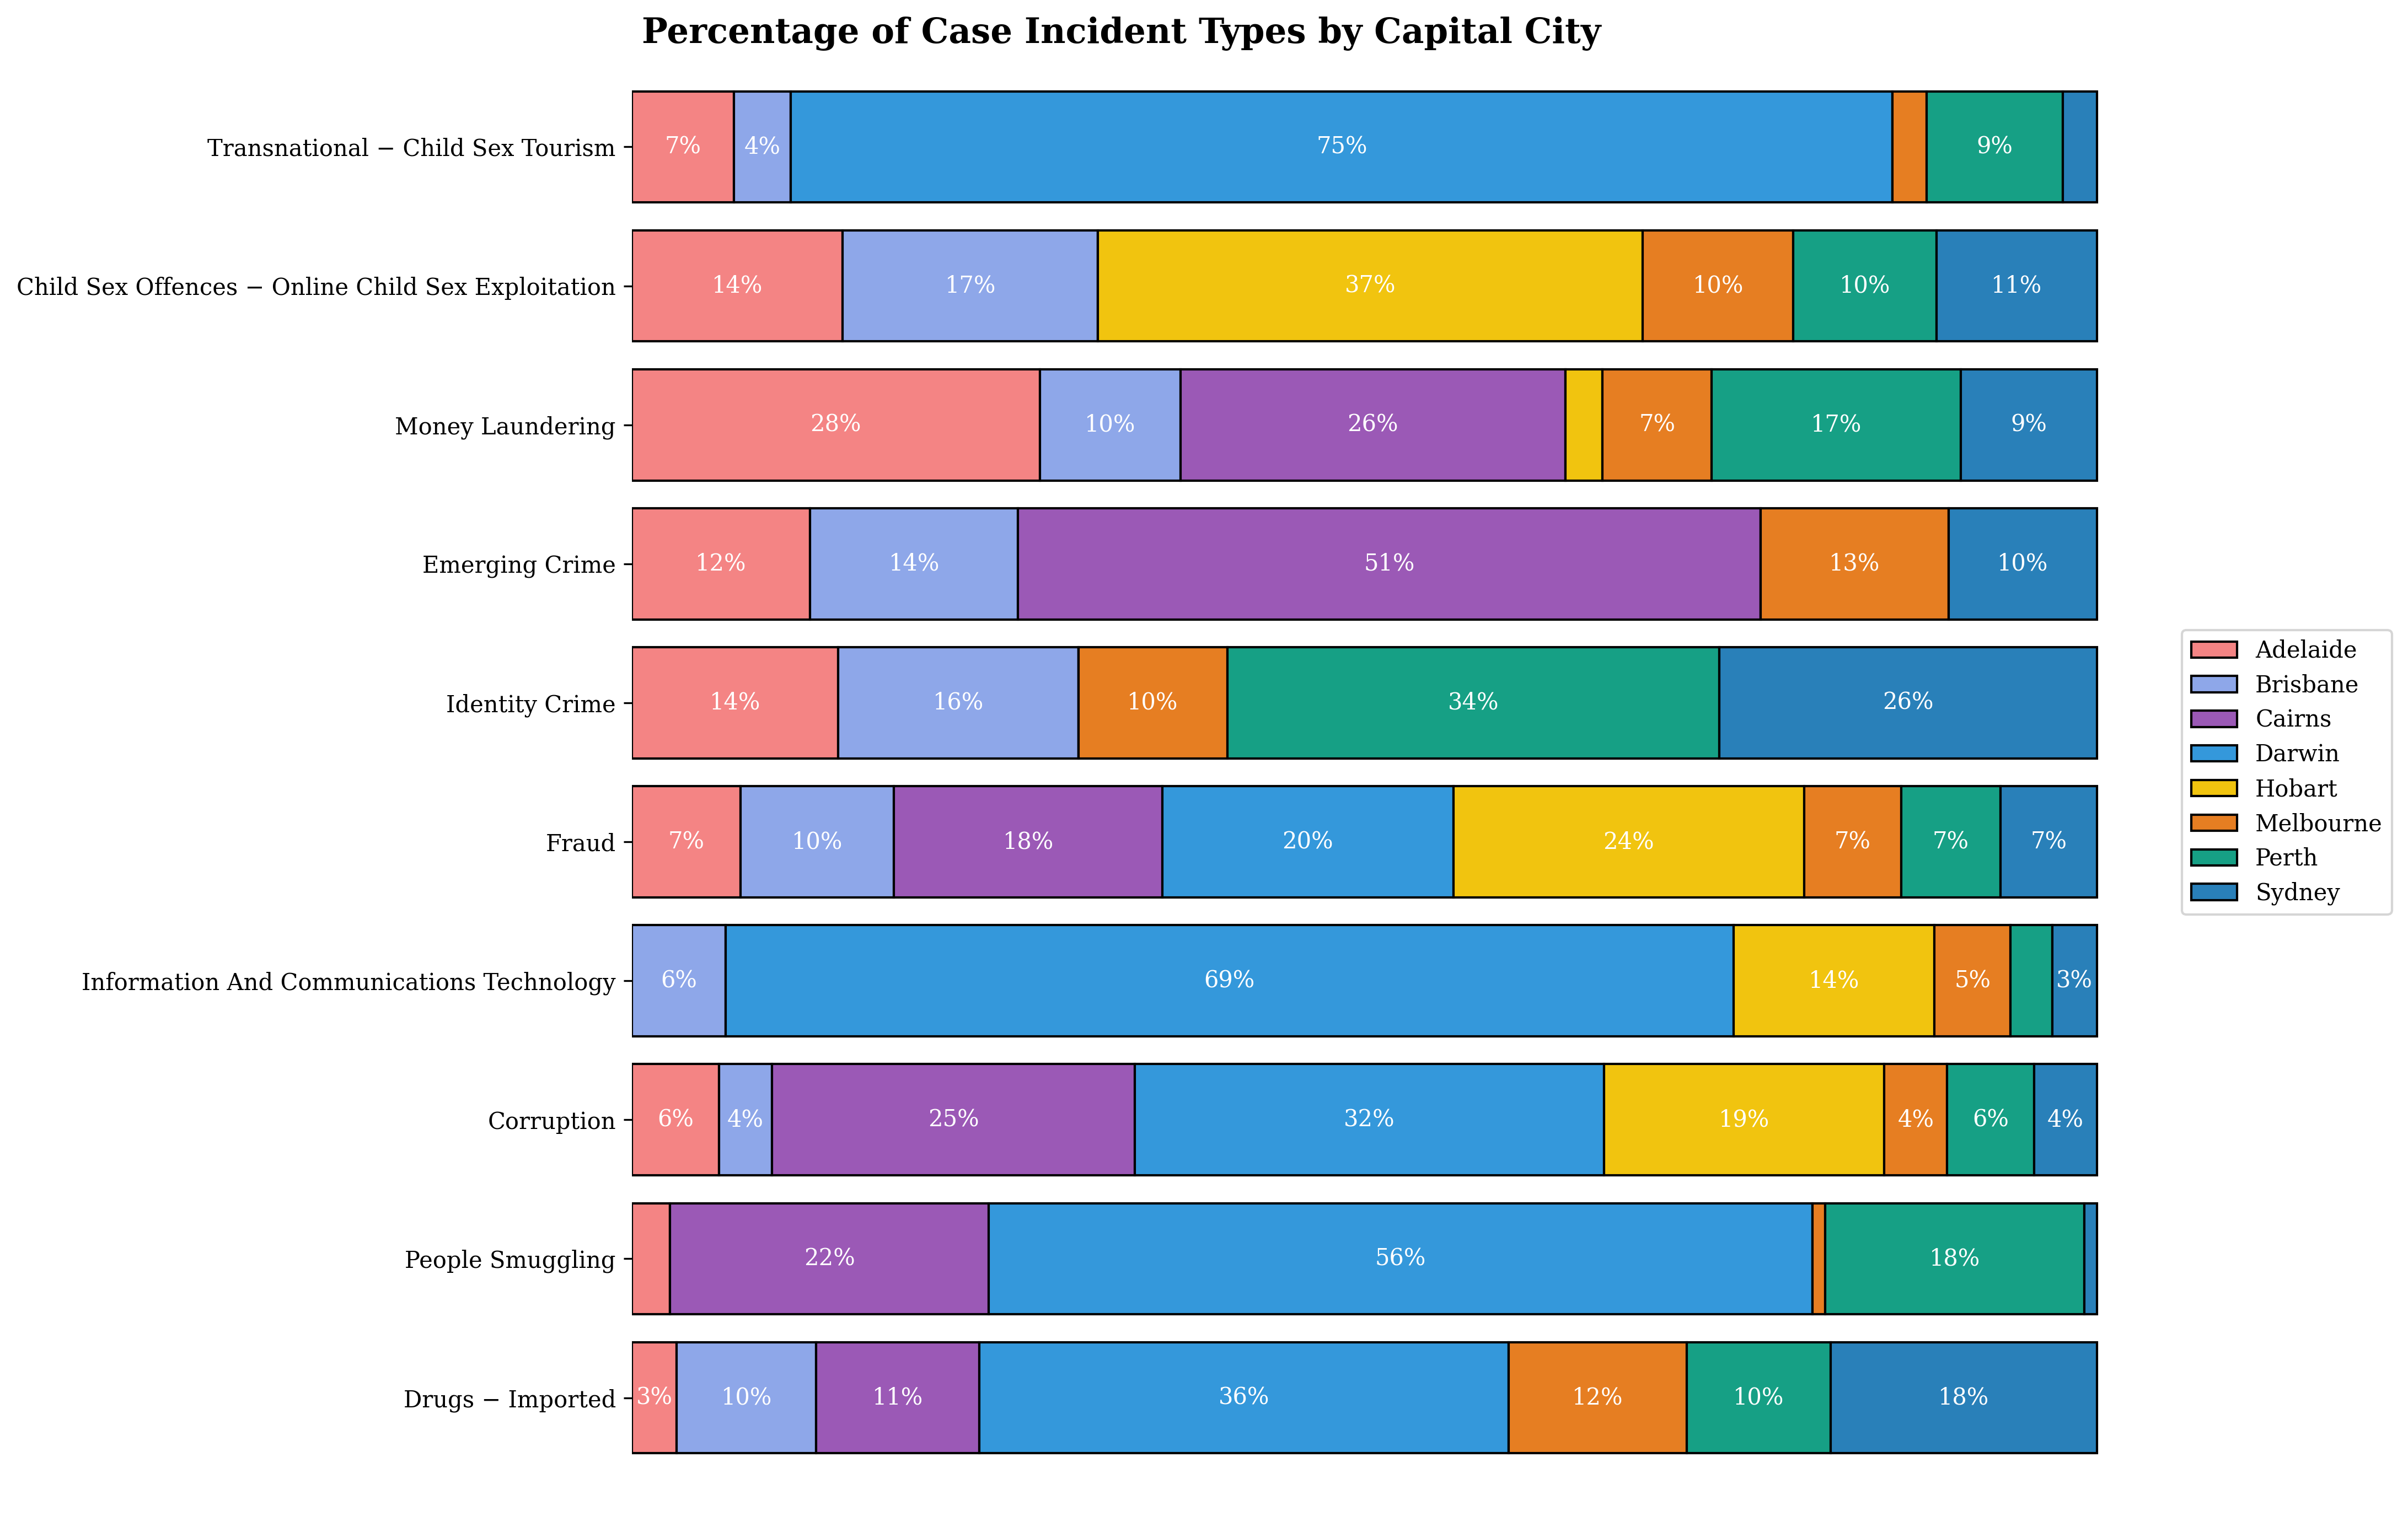

In [254]:
all_data = {}
for i in case_incident_data['Case Incident Type']:
    all_data[i] = extract_data(case_incident_data, i, city_population)

# converting the data to dataframe
df = pd.DataFrame(all_data)

# transpose the dataframe
df = df.T

# normalize the data by column
df = df.apply(lambda x: x/x.sum() * 100, axis=1)

fig, ax = plt.subplots(1,1,figsize=(12,12))

colors = ["#F48484", "#8EA7E9", "#9B59B6", "#3498DB", "#F1C40F", "#E67E22", "#16A085", "#2980B9"]

for i, (colname,col) in enumerate(df.iteritems()):
    ax.barh(df.index,col,left=df.iloc[:,:i].sum(1),label=colname, color = colors[i%len(colors)], edgecolor='black')
    for j, v in enumerate(col):
        if v>3:
            ax.annotate(f"{v:.0f}%",xy=(v/2+df.iloc[:,:i].sum(1)[j], j),color='white', va = 'center', ha='center',fontsize=10,fontweight='light')

fig.text(0.13, 0.87, 'Percentage of Case Incident Types by Capital City', fontsize=15, fontweight='bold') 

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks([])

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show()